### Import the necessary libraries -Capstone 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set_palette('deep')
sns.set(color_codes='True')

In [2]:
#import the dataset and check first 5 records
df = pd.read_csv('Data.csv')
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [3]:
#import the dataset and check last 5 records
df = pd.read_csv('Data.csv')
df.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

In [4]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [5]:
# Data summary of numeric columns
df.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
Year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_lasy_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
Year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

In [6]:
# Data summary of categorical columns
df.describe(include=[object]).T

count unique           top   freq
Occupation                    25000      3       Student  10169
cholesterol_level             25000      5    150 to 175   8763
Gender                        25000      2          Male  16422
smoking_status                25000      4  never smoked   9249
Location                      25000     15     Bangalore   1742
covered_by_any_other_company  25000      2             N  17418
Alcohol                       25000      3          Rare  13752
exercise                      25000      3      Moderate  14638

In [7]:
# Find the categorical column unique values
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':',df[i].sort_values().unique())

Occupation : ['Business' 'Salried' 'Student']
cholesterol_level : ['125 to 150' '150 to 175' '175 to 200' '200 to 225' '225 to 250']
Gender : ['Female' 'Male']
smoking_status : ['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Location : ['Ahmedabad' 'Bangalore' 'Bhubaneswar' 'Chennai' 'Delhi' 'Guwahati'
 'Jaipur' 'Kanpur' 'Kolkata' 'Lucknow' 'Mangalore' 'Mumbai' 'Nagpur'
 'Pune' 'Surat']
covered_by_any_other_company : ['N' 'Y']
Alcohol : ['Daily' 'No' 'Rare']
exercise : ['Extreme' 'Moderate' 'No']


In [8]:
# Lets create a dictionary to rename the columns.
dictionary = {'years_of_insurance_with_us': 'relationship_years','regular_checkup_lasy_year': 'checkup_count',
              'visited_doctor_last_1_year': 'consultation_count','daily_avg_steps': 'avg_steps',
              'heart_decs_history': 'heart_incident','other_major_decs_history': 'decs_incident',
              'avg_glucose_level': 'glucose_level','Year_last_admitted': 'last_admitted',
              'covered_by_any_other_company': 'other_insurers','weight_change_in_last_one_year' : 'weight_change'
}
df.rename(columns=dictionary, inplace=True)
df.columns

Index(['applicant_id', 'relationship_years', 'checkup_count',
       'adventure_sports', 'Occupation', 'consultation_count',
       'cholesterol_level', 'avg_steps', 'age', 'heart_incident',
       'decs_incident', 'Gender', 'glucose_level', 'bmi', 'smoking_status',
       'last_admitted', 'Location', 'weight', 'other_insurers', 'Alcohol',
       'exercise', 'weight_change', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [9]:
# Lets remove the applicant_id column as its a nominal field
df_input = df.copy()
df.drop('applicant_id',axis=1,inplace=True)
df.columns

Index(['relationship_years', 'checkup_count', 'adventure_sports', 'Occupation',
       'consultation_count', 'cholesterol_level', 'avg_steps', 'age',
       'heart_incident', 'decs_incident', 'Gender', 'glucose_level', 'bmi',
       'smoking_status', 'last_admitted', 'Location', 'weight',
       'other_insurers', 'Alcohol', 'exercise', 'weight_change',
       'fat_percentage', 'insurance_cost'],
      dtype='object')

## Univariate Analysis 

In [10]:
# Lets calculate range IQR and Quartile min and Quartile max of cotinuous variables into a dataset
df_desc = df.describe().T
df_desc['Range'] = 0
df_desc['IQR'] = 0
df_desc['Qmin'] = 0
df_desc['Qmax'] = 0
for ind in df_desc.index:
    df_desc.loc[ind,'Range'] = df_desc['max'][ind] - df_desc['min'][ind]
    df_desc.loc[ind,'IQR'] = df_desc['75%'][ind] - df_desc['25%'][ind]
    IQR_mult = np.where(df_desc['50%'][ind] == df_desc['25%'][ind],1,1.5)
    df_desc.loc[ind,'Qmin'] = np.where((df_desc['25%'][ind] - IQR_mult * df_desc['IQR'][ind]) < df_desc['min'][ind],df_desc['min'][ind],(df_desc['25%'][ind] - IQR_mult * df_desc['IQR'][ind]))
    df_desc.loc[ind,'Qmax'] = np.where((df_desc['75%'][ind] + IQR_mult * df_desc['IQR'][ind]) > df_desc['max'][ind],df_desc['max'][ind],(df_desc['75%'][ind] + IQR_mult * df_desc['IQR'][ind]))
df_desc

count          mean           std     min      25%  \
relationship_years  25000.0      4.089040      2.606612     0.0      2.0   
checkup_count       25000.0      0.773680      1.199449     0.0      0.0   
adventure_sports    25000.0      0.081720      0.273943     0.0      0.0   
consultation_count  25000.0      3.104200      1.141663     0.0      2.0   
avg_steps           25000.0   5215.889320   1053.179748  2034.0   4543.0   
age                 25000.0     44.918320     16.107492    16.0     31.0   
heart_incident      25000.0      0.054640      0.227281     0.0      0.0   
decs_incident       25000.0      0.098160      0.297537     0.0      0.0   
glucose_level       25000.0    167.530000     62.729712    57.0    113.0   
bmi                 24010.0     31.393328      7.876535    12.3     26.1   
last_admitted       13119.0   2003.892217      7.581521  1990.0   1997.0   
weight              25000.0     71.610480      9.325183    52.0     64.0   
weight_change       25000.0      2.517960      1.690335     0.0      1.0   
fat_percentage      25000.0     28.812280      8.632382    11.0     21.0   
insurance_cost      25000.0  27147.407680  14323.691832  2468.0  16042.0   

                        50%      75%      max    Range      IQR    Qmin  \
relationship_years      4.0      6.0      8.0      8.0      4.0     0.0   
checkup_count           0.0      1.0      5.0      5.0      1.0     0.0   
adventure_sports        0.0      0.0      1.0      1.0      0.0     0.0   
consultation_count      3.0      4.0     12.0     12.0      2.0     0.0   
avg_steps            5089.0   5730.0  11255.0   9221.0   1187.0  2762.5   
age                    45.0     59.0     74.0     58.0     28.0    16.0   
heart_incident          0.0      0.0      1.0      1.0      0.0     0.0   
decs_incident           0.0      0.0      1.0      1.0      0.0     0.0   
glucose_level         168.0    222.0    277.0    220.0    109.0    57.0   
bmi                    30.5     35.6    100.6     88.3      9.5    12.3   
last_admitted        2004.0   2010.0   2018.0     28.0     13.0  1990.0   
weight                 72.0     78.0     96.0     44.0     14.0    52.0   
weight_change           3.0      4.0      6.0      6.0      3.0     0.0   
fat_percentage         31.0     36.0     42.0     31.0     15.0    11.0   
insurance_cost      27148.0  37020.0  67870.0  65402.0  20978.0  2468.0   

                        Qmax  
relationship_years      8.00  
checkup_count           2.00  
adventure_sports        0.00  
consultation_count      7.00  
avg_steps            7510.50  
age                    74.00  
heart_incident          0.00  
decs_incident           0.00  
glucose_level         277.00  
bmi                    49.85  
last_admitted        2018.00  
weight                 96.00  
weight_change           6.00  
fat_percentage         42.00  
insurance_cost      67870.00

### Univariate Analysis

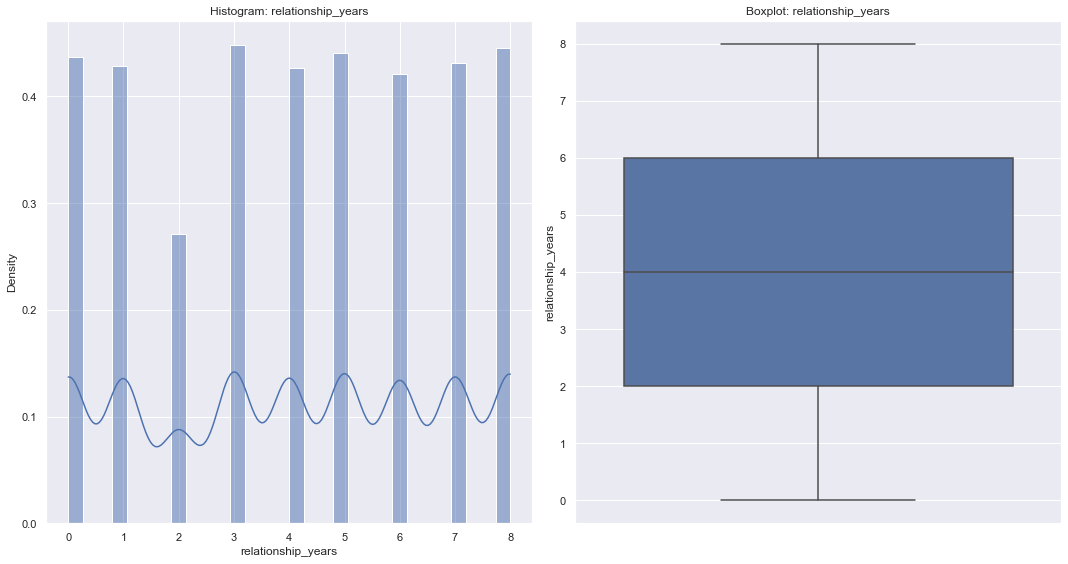

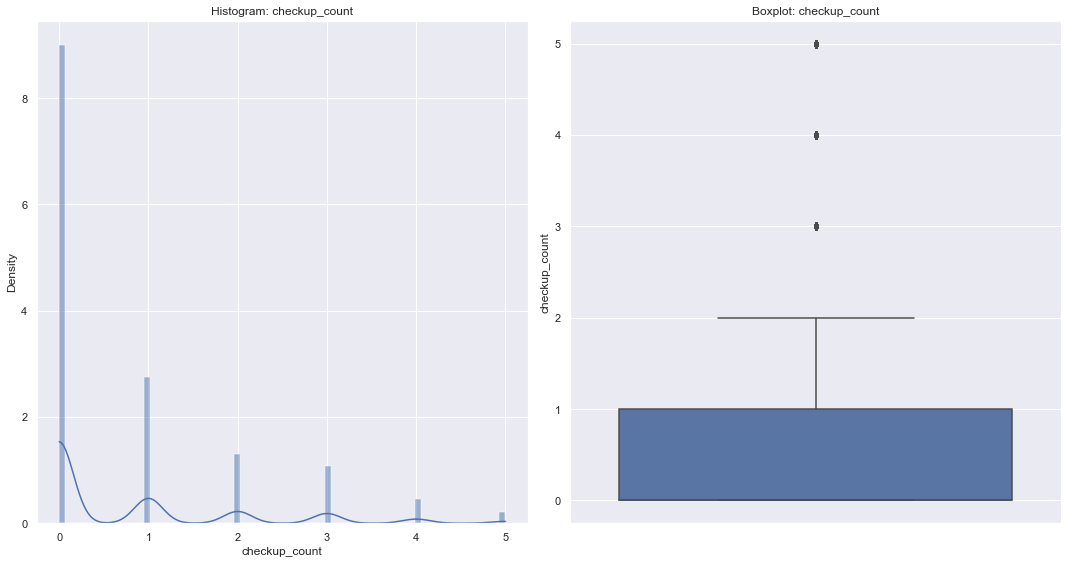

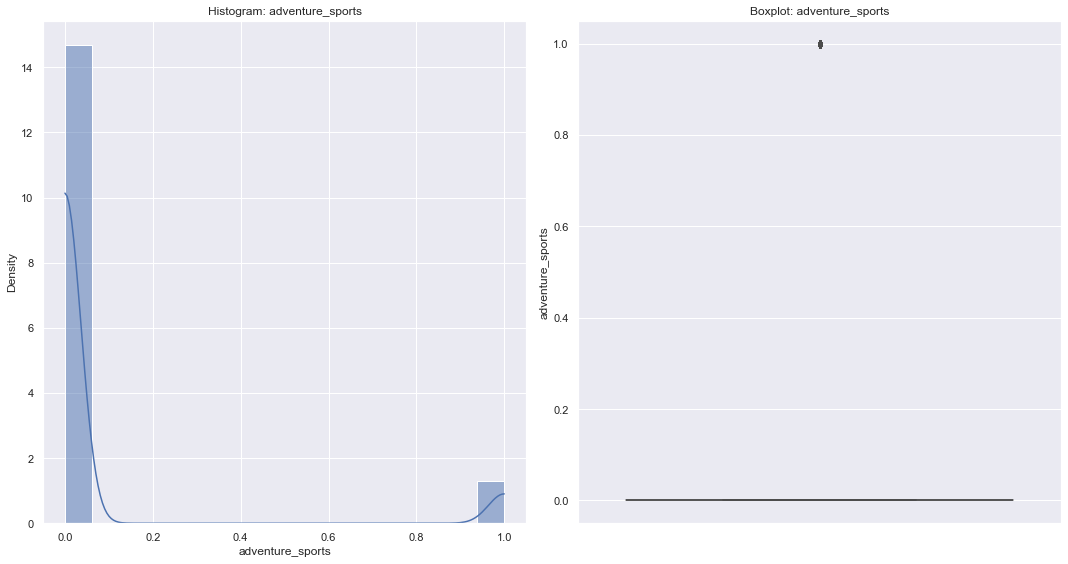

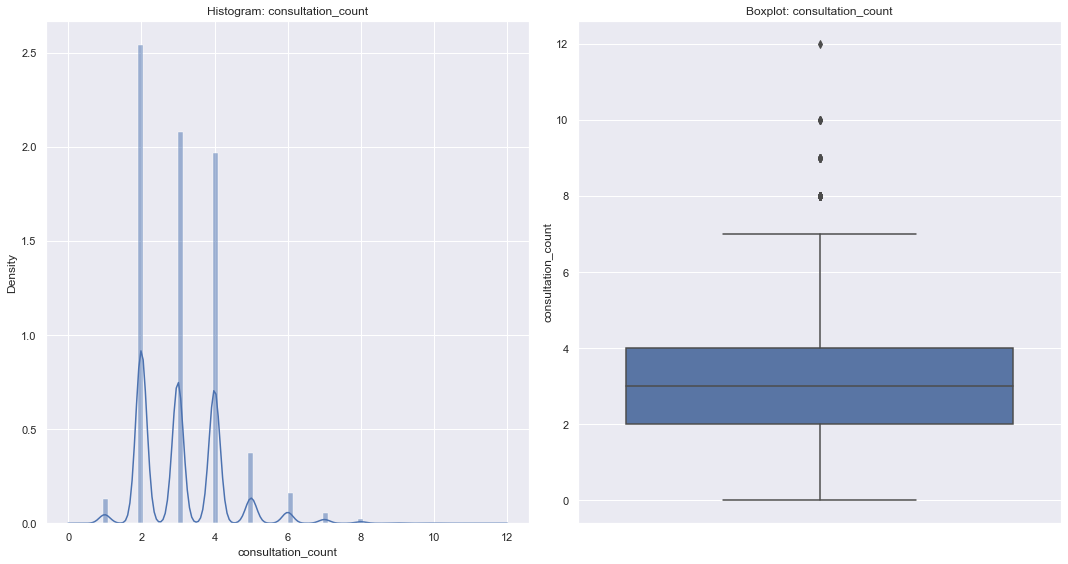

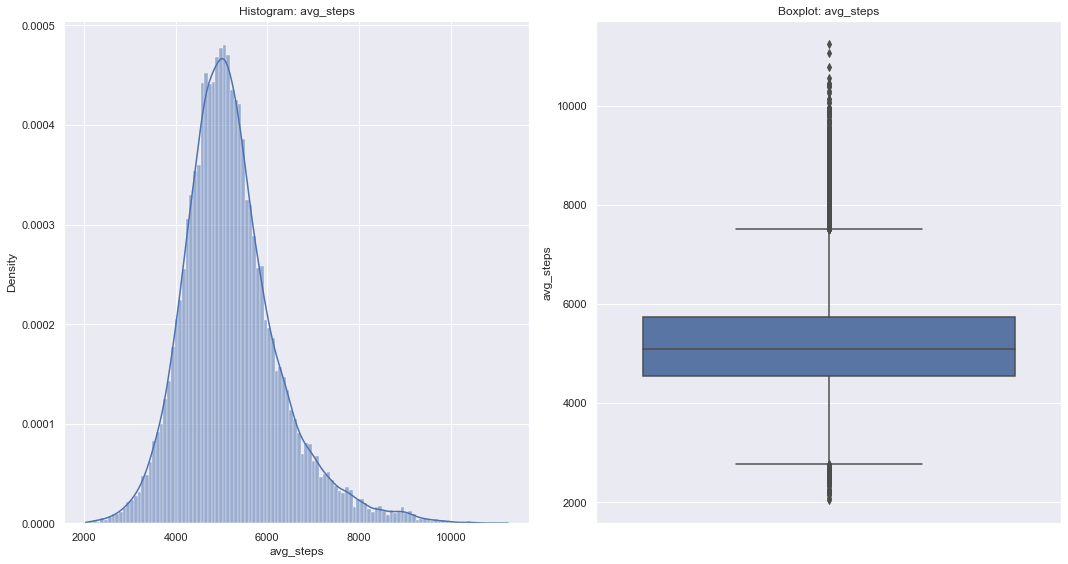

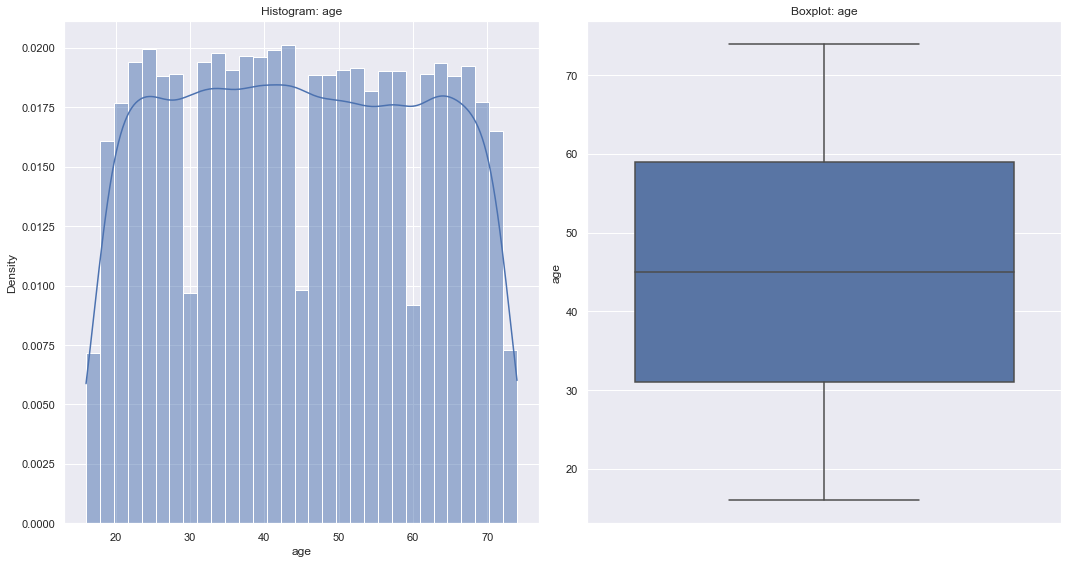

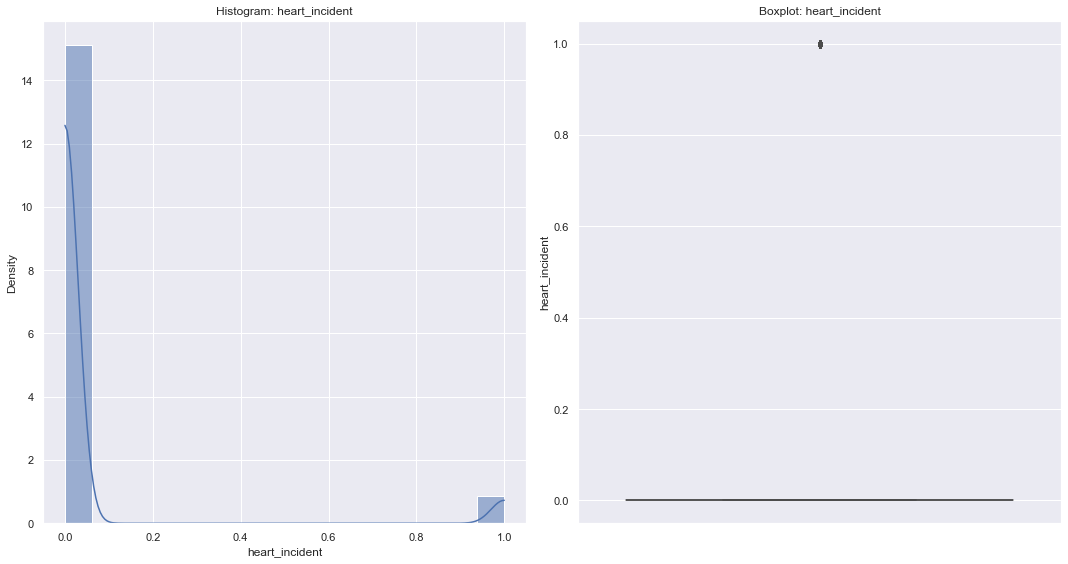

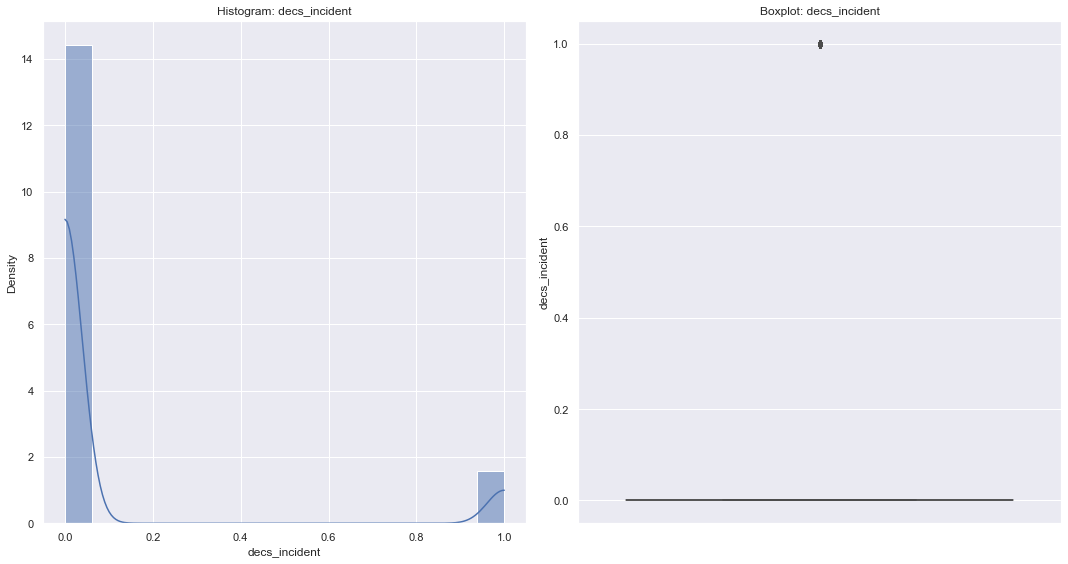

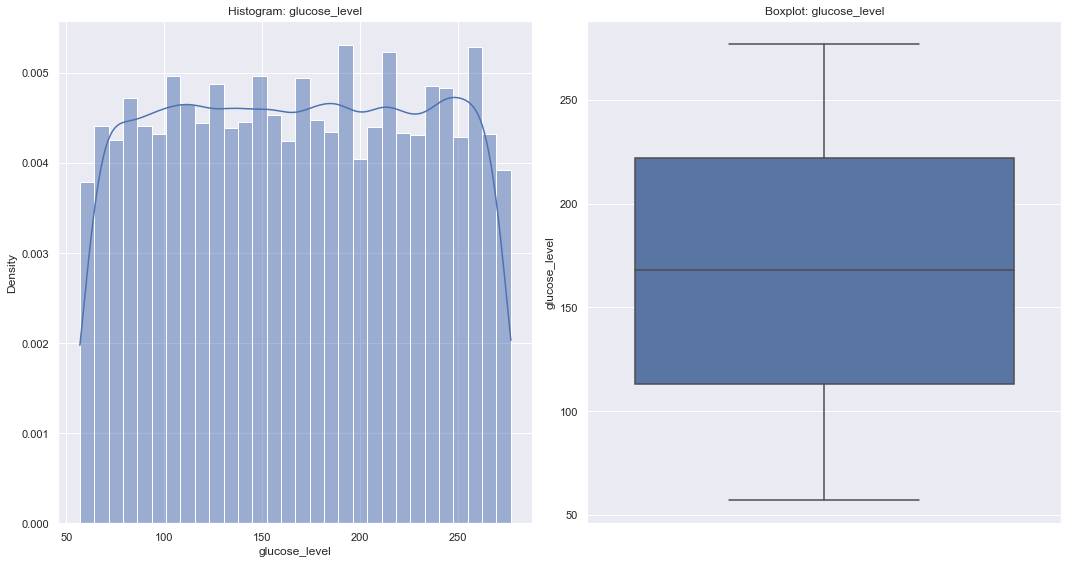

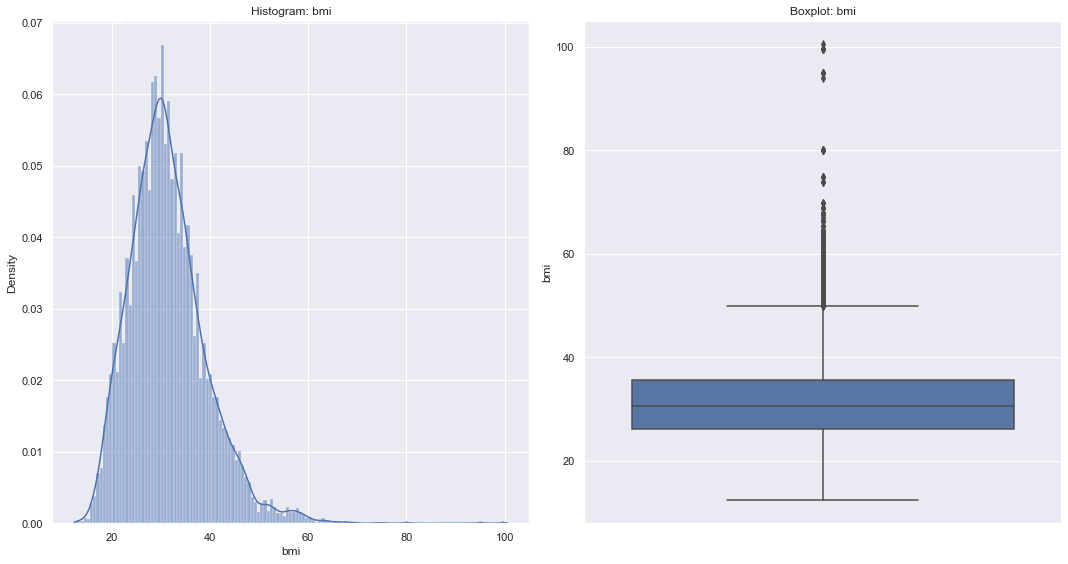

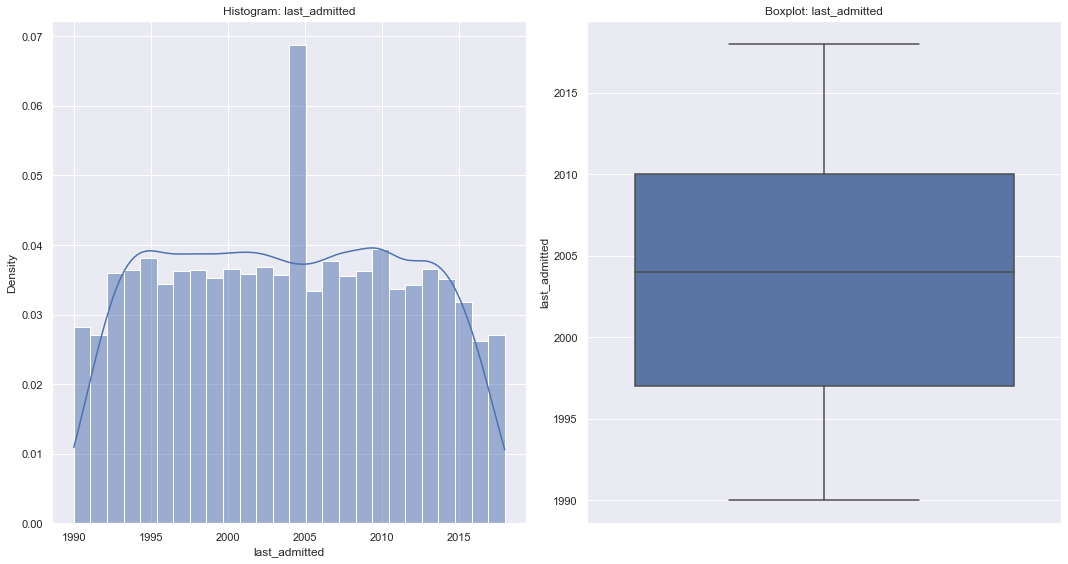

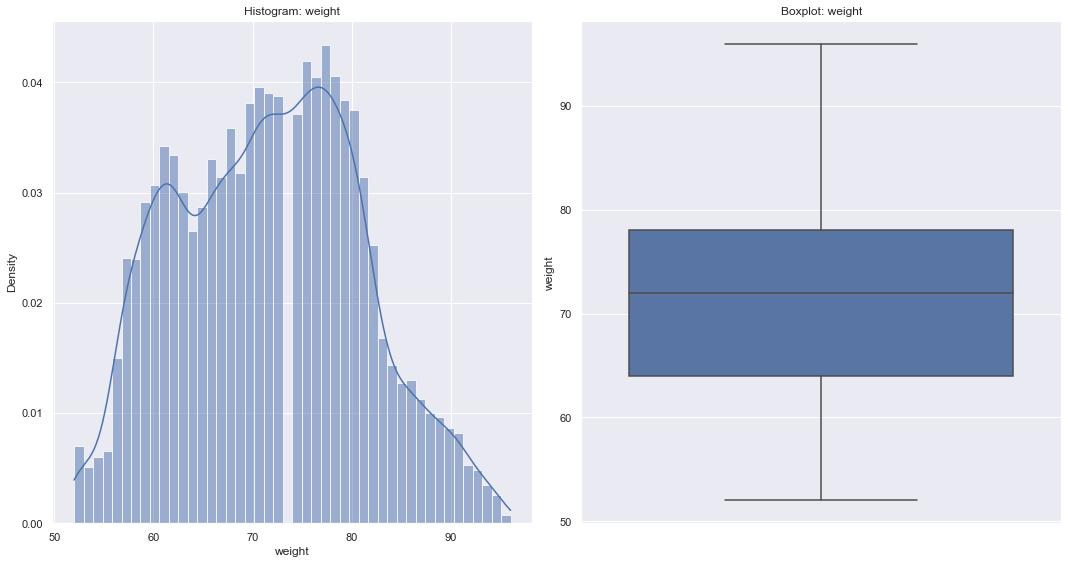

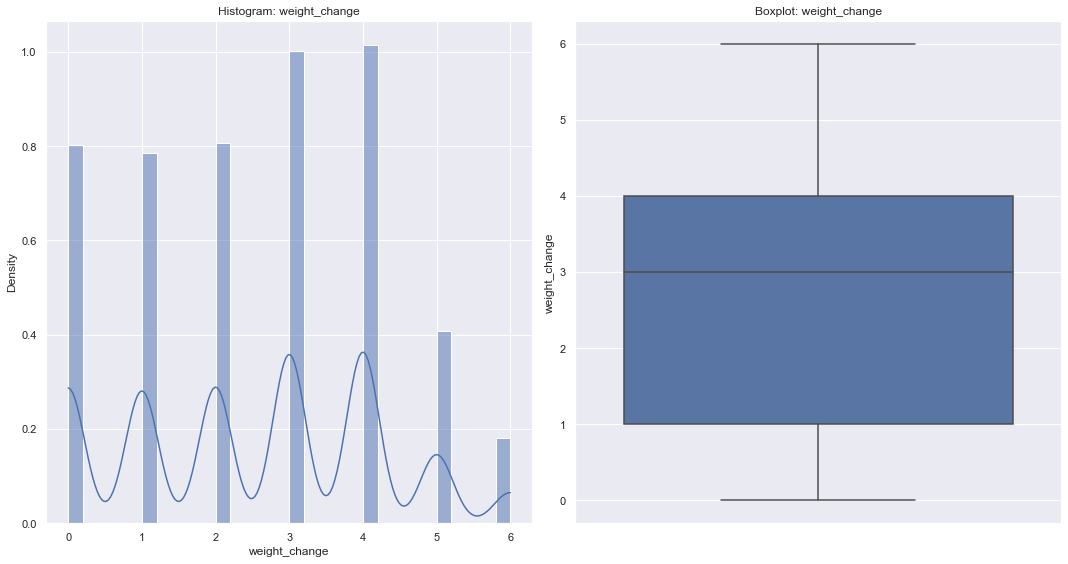

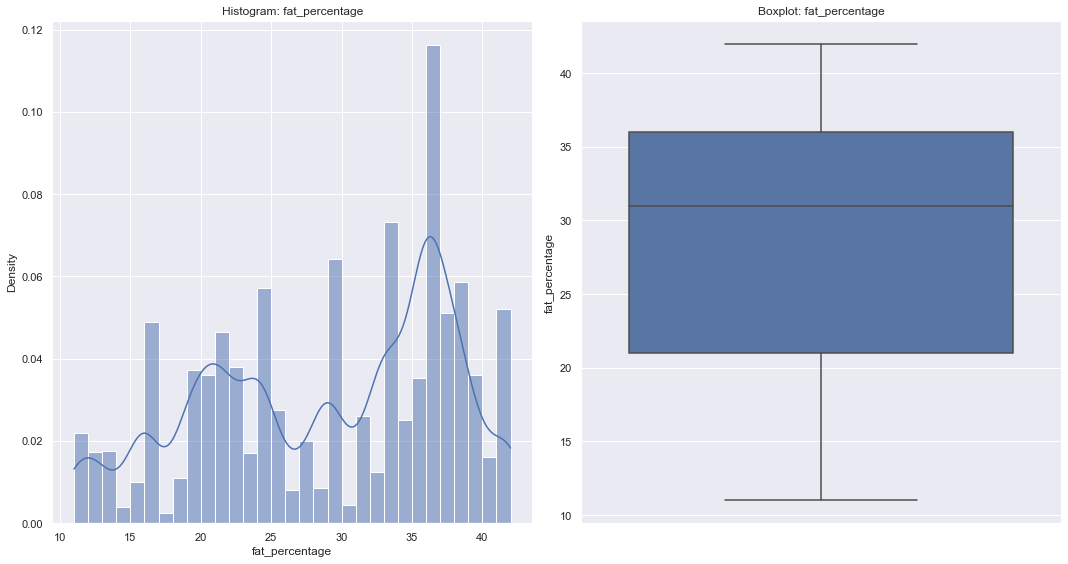

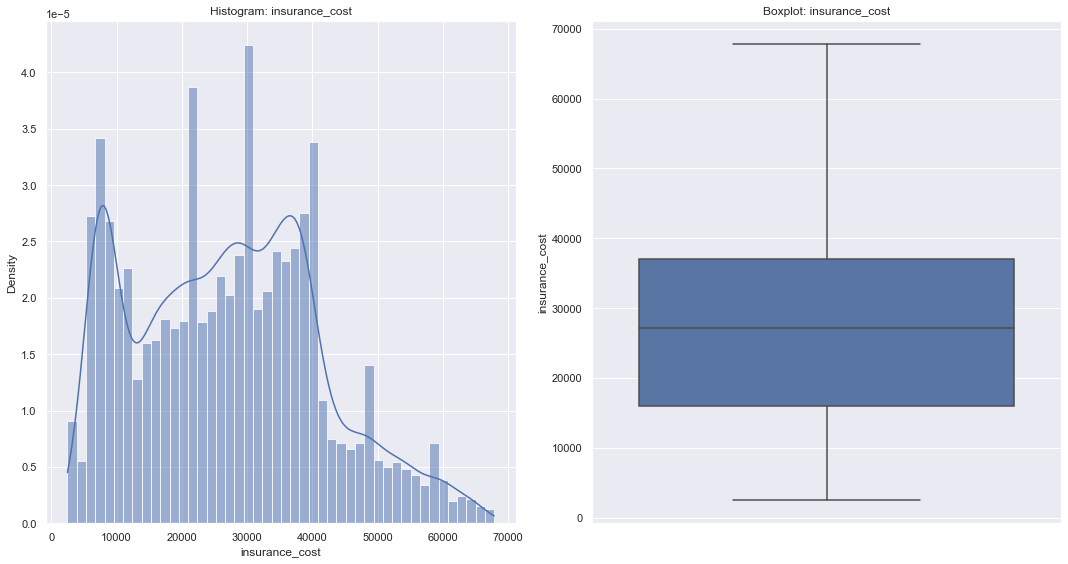

In [11]:
# Check the histogram and boxplot of the continous varaibles

for i in df.columns:
    if df[i].dtype not in ['object']:
        plt.figure(figsize = (15,8));
        plt.subplot(1,2,1);
        sns.histplot(x=df[i],kde=True,stat='density');
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=df[i],data=df);
        plt.title('Boxplot: {}'.format(i))                
        plt.tight_layout();

In [12]:
# Let us find the skew of continuous variables
df.skew()

relationship_years   -0.075217
checkup_count         1.610907
adventure_sports      3.054017
consultation_count    0.978456
avg_steps             0.908867
age                   0.013860
heart_incident        3.919343
decs_incident         2.701327
glucose_level        -0.006389
bmi                   1.056428
last_admitted         0.013532
weight                0.109077
weight_change         0.068026
fat_percentage       -0.363262
insurance_cost        0.331650
dtype: float64

In [13]:
# lets find the descriptive statistics of categorical column:
df.describe(include=[object]).T

count unique           top   freq
Occupation         25000      3       Student  10169
cholesterol_level  25000      5    150 to 175   8763
Gender             25000      2          Male  16422
smoking_status     25000      4  never smoked   9249
Location           25000     15     Bangalore   1742
other_insurers     25000      2             N  17418
Alcohol            25000      3          Rare  13752
exercise           25000      3      Moderate  14638

In [14]:
# lets see the datadistribution for object columns:
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':')
        print(df[i].value_counts())
        print('------------------','\n','\n')

Occupation :
Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64
------------------ 
 

cholesterol_level :
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64
------------------ 
 

Gender :
Male      16422
Female     8578
Name: Gender, dtype: int64
------------------ 
 

smoking_status :
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64
------------------ 
 

Location :
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64
------------------ 
 

other_insurers :
N    17418
Y     7582
Name: other_insurers, dtype: int64
----

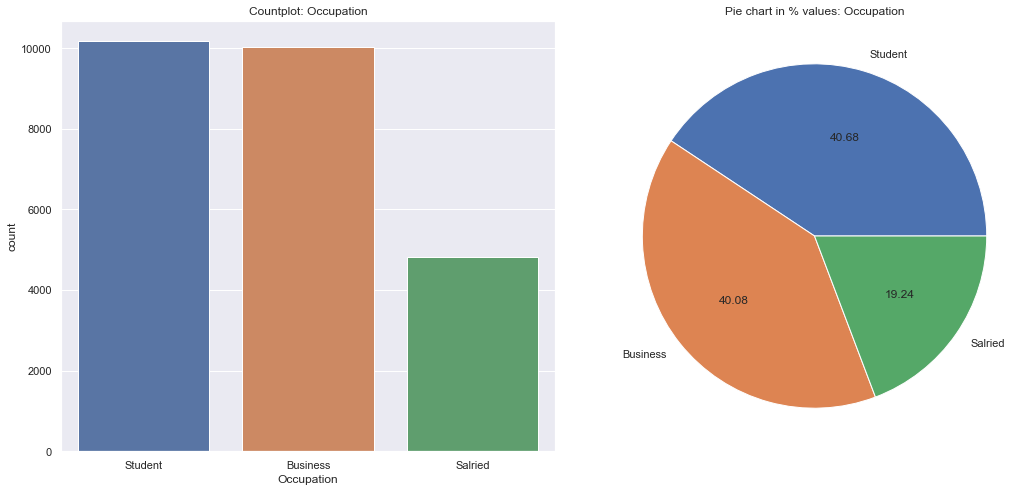

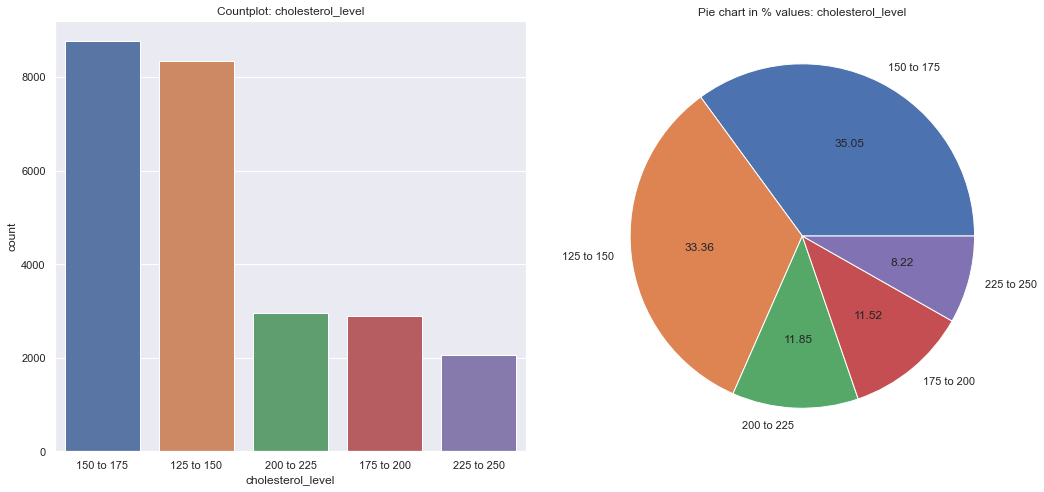

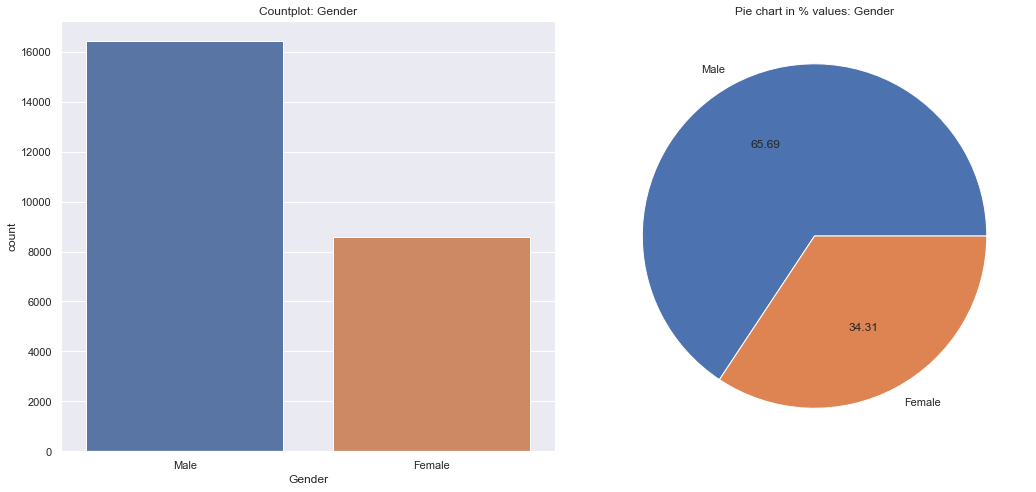

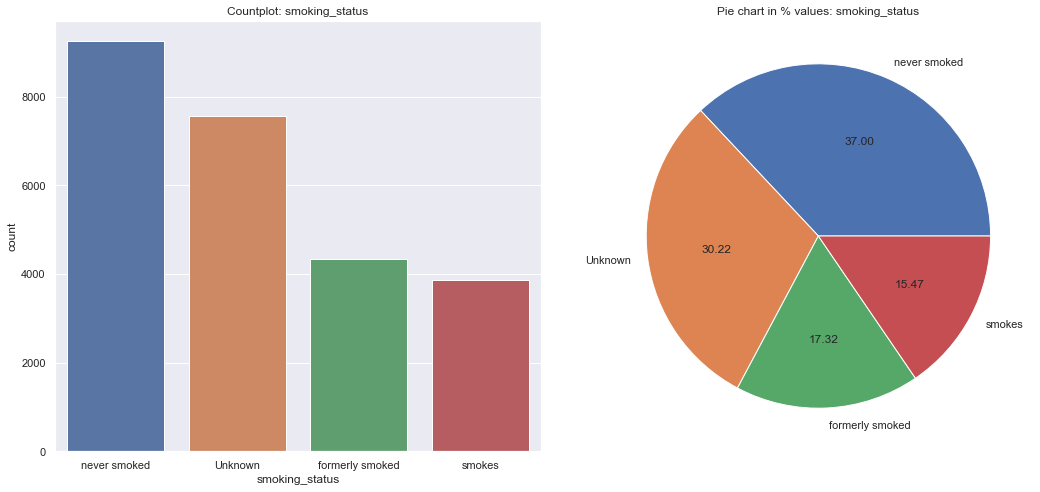

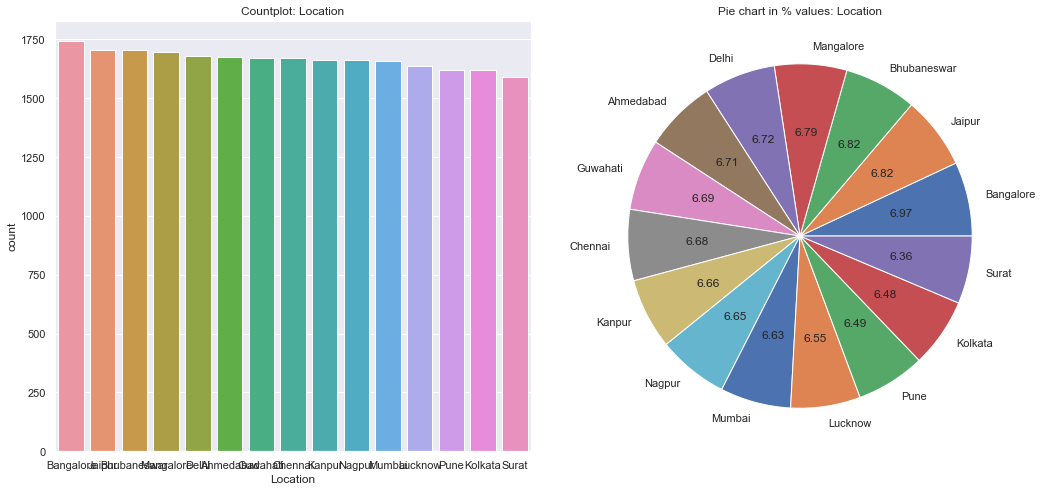

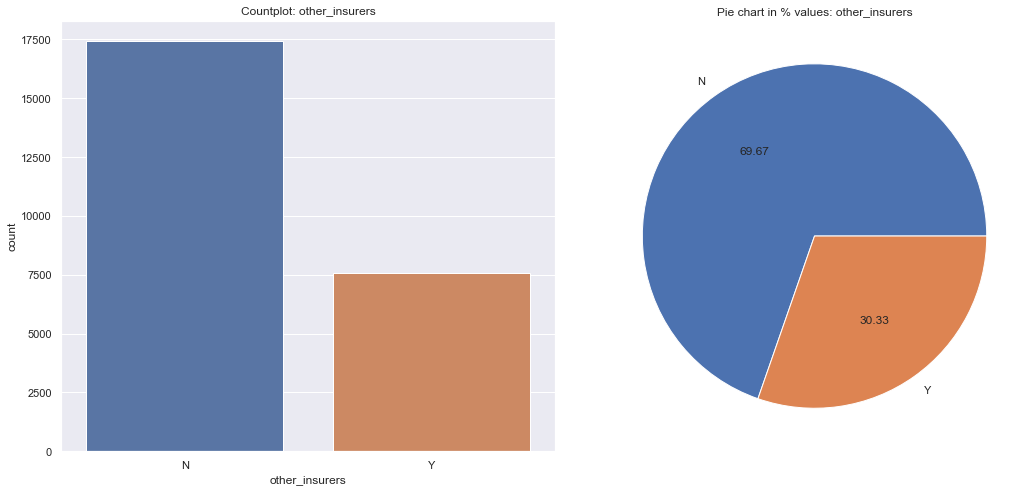

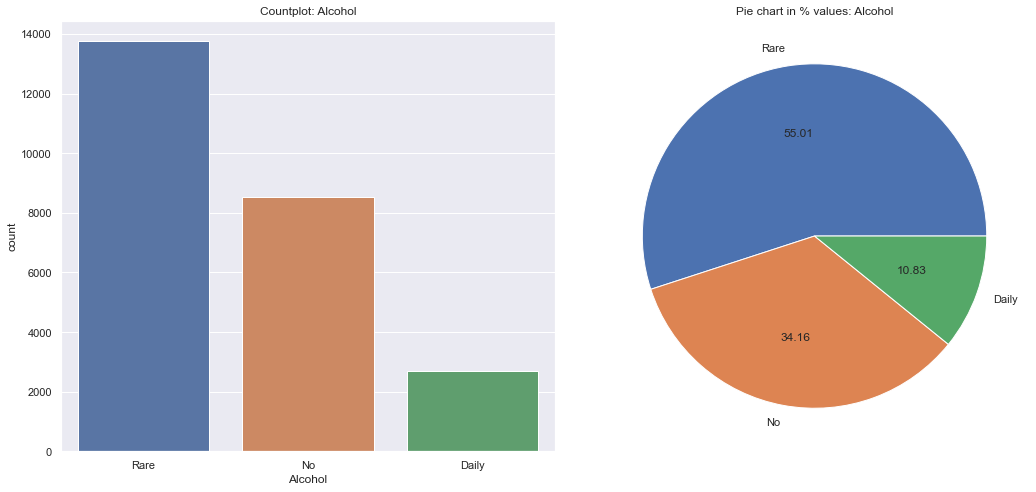

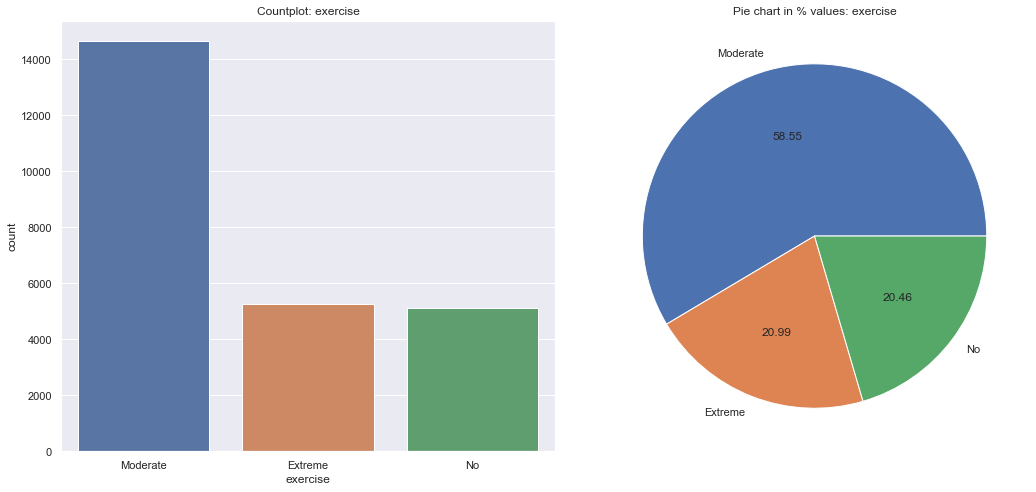

In [15]:
# countplot and piechart showing distribution of categories across the variable for object columns
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot: {}'.format(i));
        plt.subplot(1,2,2);
        plt.pie(x=df[i].value_counts(),labels = df[i].value_counts().index,autopct='%.2f')
        plt.title('Pie chart in % values: {}'.format(i))                
        plt.tight_layout();
        

### Bivariate/Multivariate Analysis

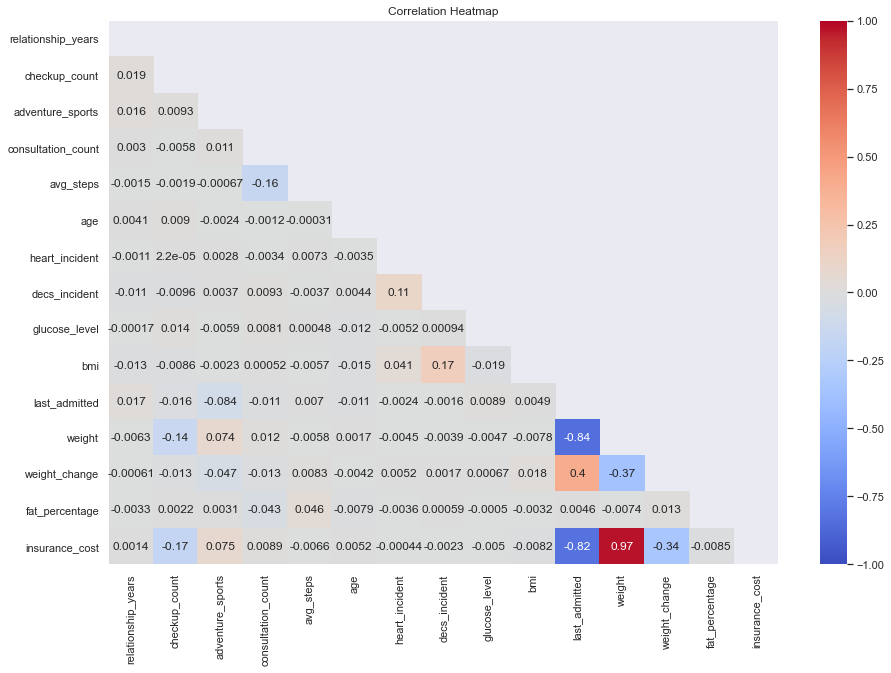

In [16]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

<Figure size 1080x720 with 0 Axes>

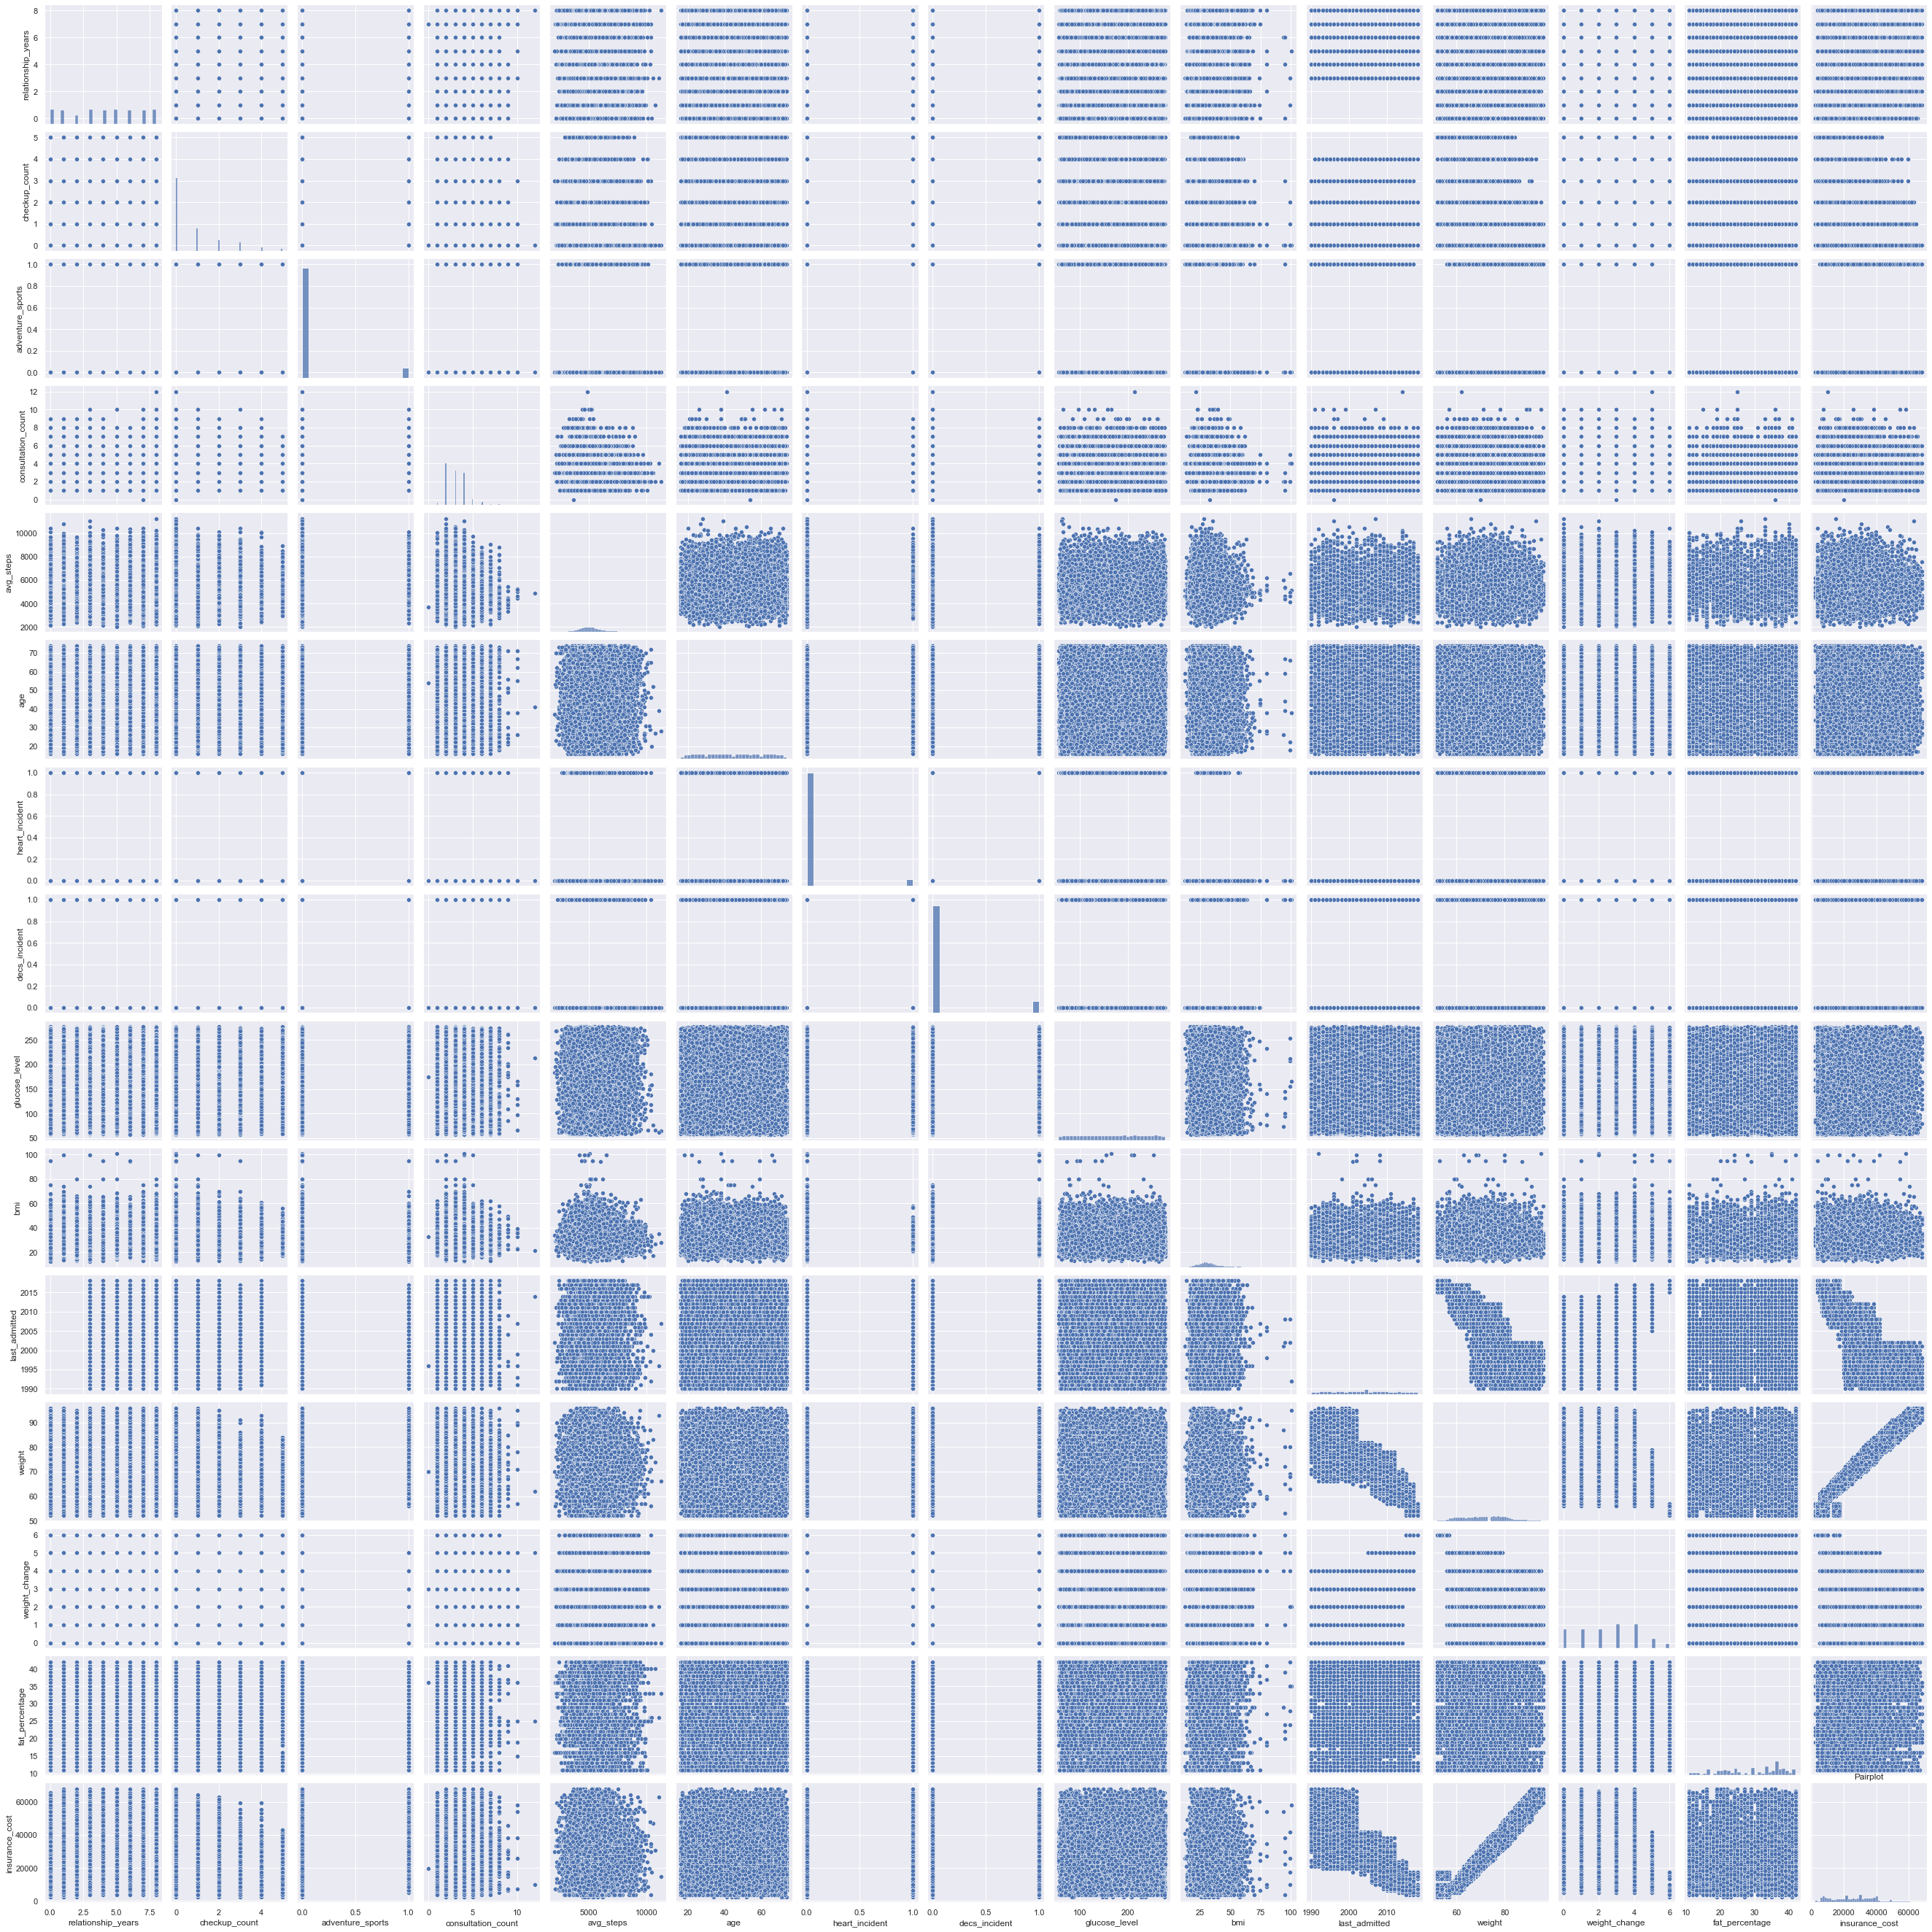

In [17]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df);
plt.title('Pairplot');

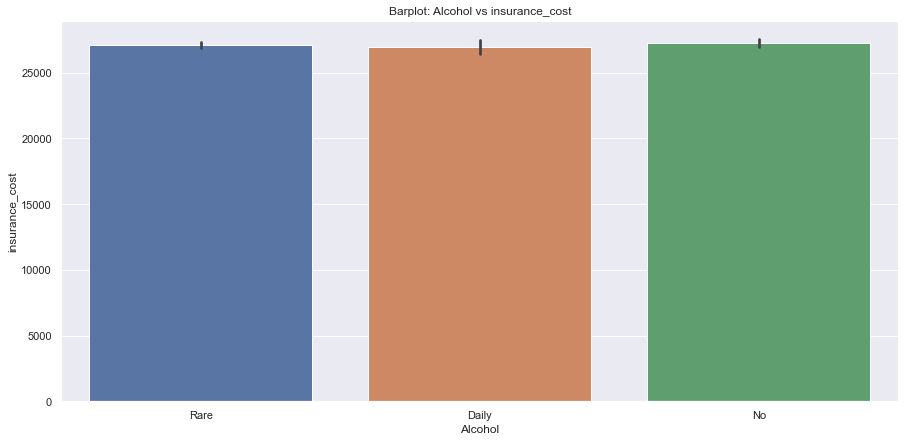

In [18]:
# Barplot of Alcohol vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: Alcohol vs insurance_cost');
sns.barplot(x='Alcohol',data=df,y='insurance_cost');

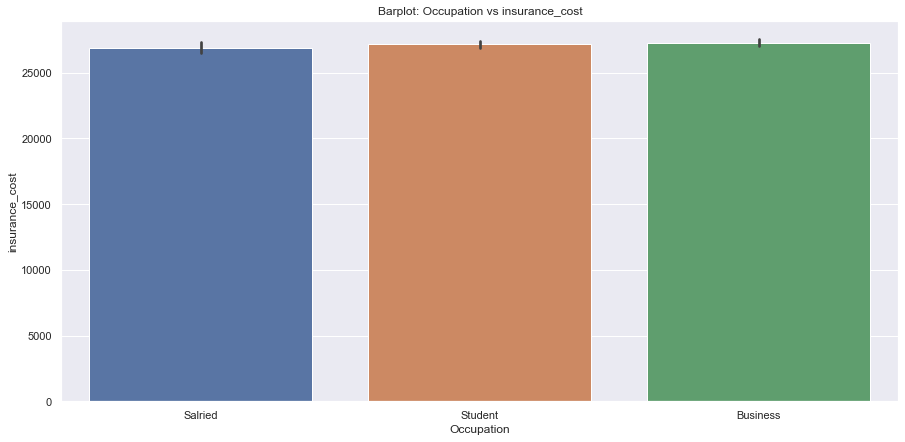

In [19]:
# Barplot of Occupation vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: Occupation vs insurance_cost');
sns.barplot(x='Occupation',data=df,y='insurance_cost');

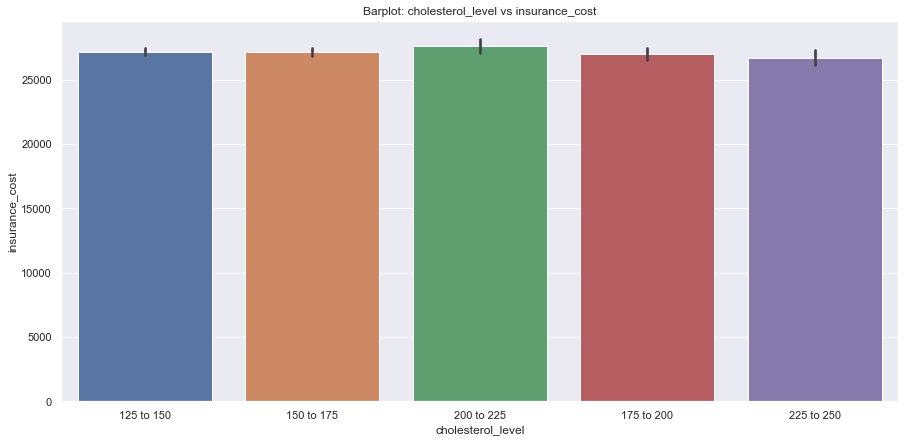

In [20]:
# Barplot of cholesterol_level vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: cholesterol_level vs insurance_cost');
sns.barplot(x='cholesterol_level',data=df,y='insurance_cost');

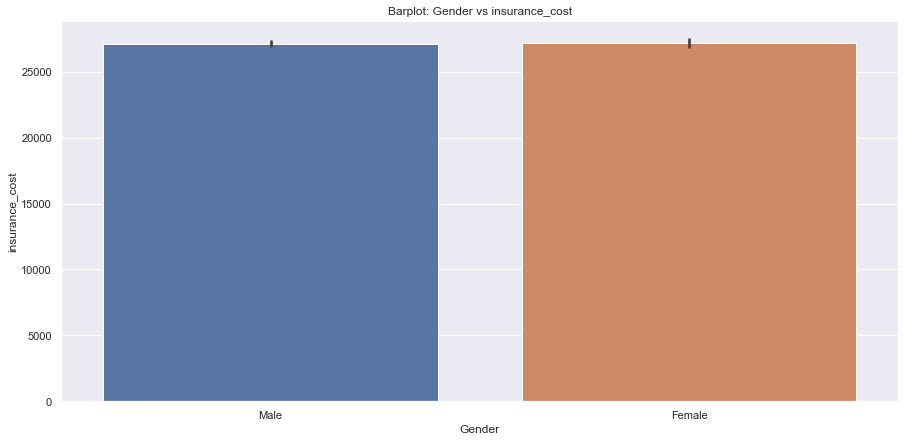

In [21]:
# Barplot of Gender vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: Gender vs insurance_cost');
sns.barplot(x='Gender',data=df,y='insurance_cost');

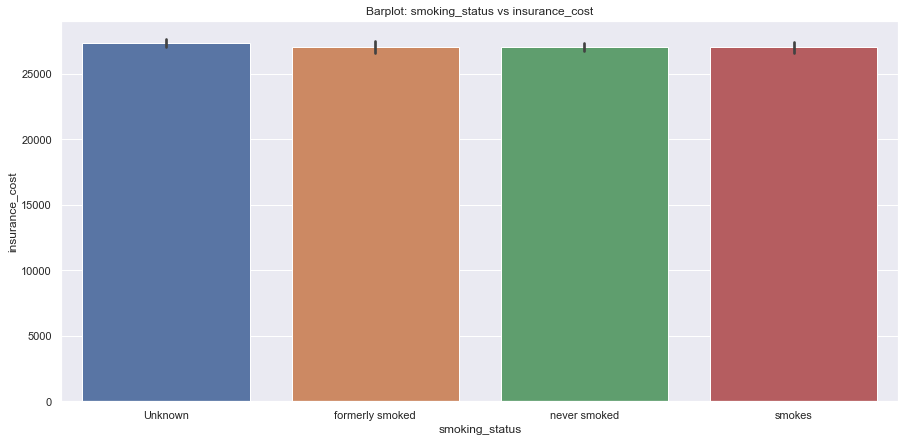

In [22]:
# Barplot of smoking_status vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: smoking_status vs insurance_cost');
sns.barplot(x='smoking_status',data=df,y='insurance_cost');

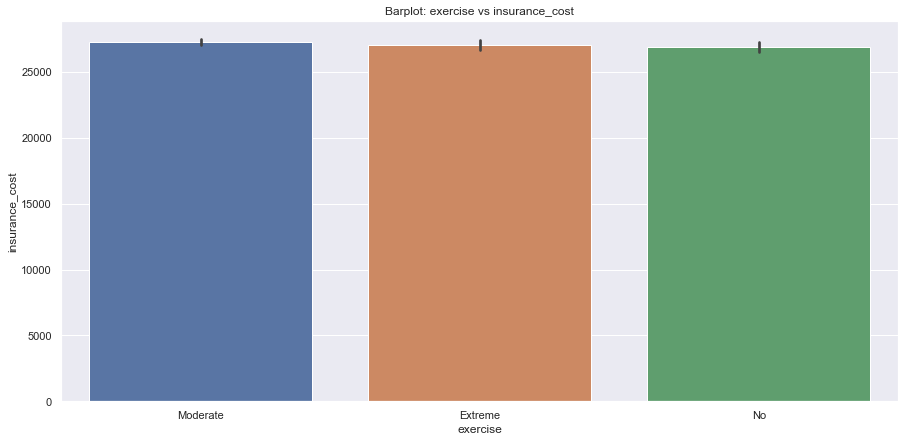

In [23]:
# Barplot of exercise vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: exercise vs insurance_cost');
sns.barplot(x='exercise',data=df,y='insurance_cost');

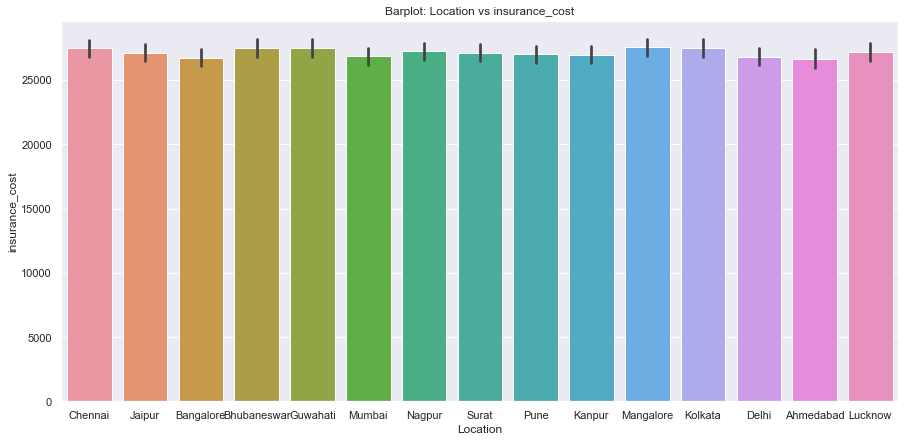

In [24]:
# Barplot of Location vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: Location vs insurance_cost');
sns.barplot(x='Location',data=df,y='insurance_cost');

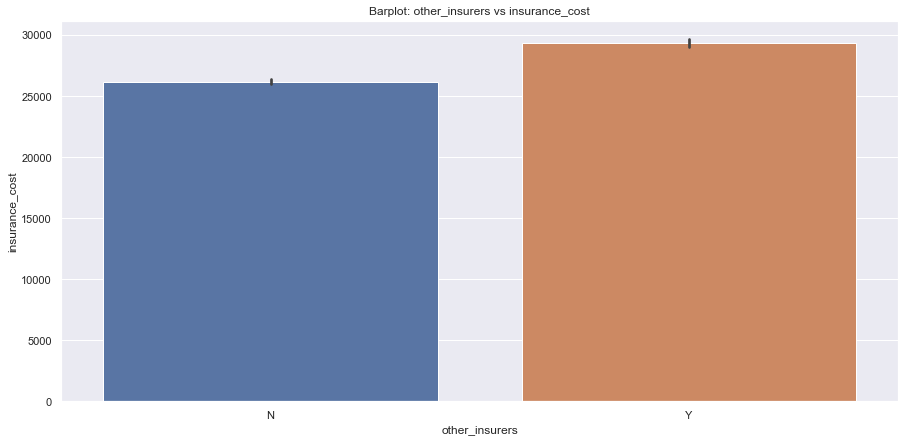

In [25]:
# Barplot of other_insurers vs insurance_cost
plt.figure(figsize = (15,7))
plt.title('Barplot: other_insurers vs insurance_cost');
sns.barplot(x='other_insurers',data=df,y='insurance_cost');

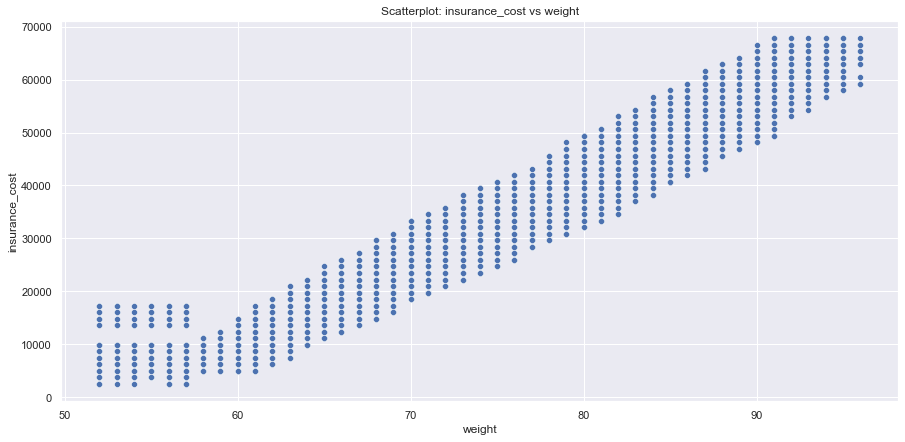

In [26]:
# Scatterplot of insurance_cost vs weight
plt.figure(figsize = (15,7))
plt.title('Scatterplot: insurance_cost vs weight');
sns.scatterplot(data=df,y='insurance_cost',x='weight');

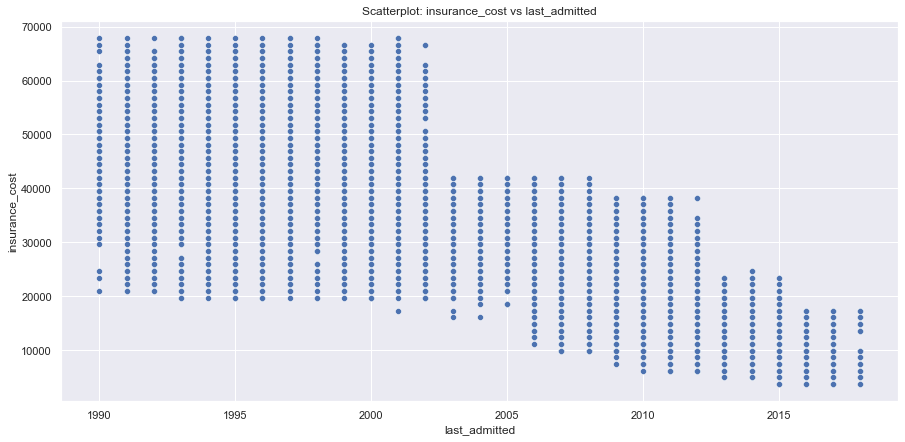

In [27]:
# Scatterplot of insurance_cost vs last_admitted
plt.figure(figsize = (15,7))
plt.title('Scatterplot: insurance_cost vs last_admitted');
sns.scatterplot(data=df,y='insurance_cost',x='last_admitted');

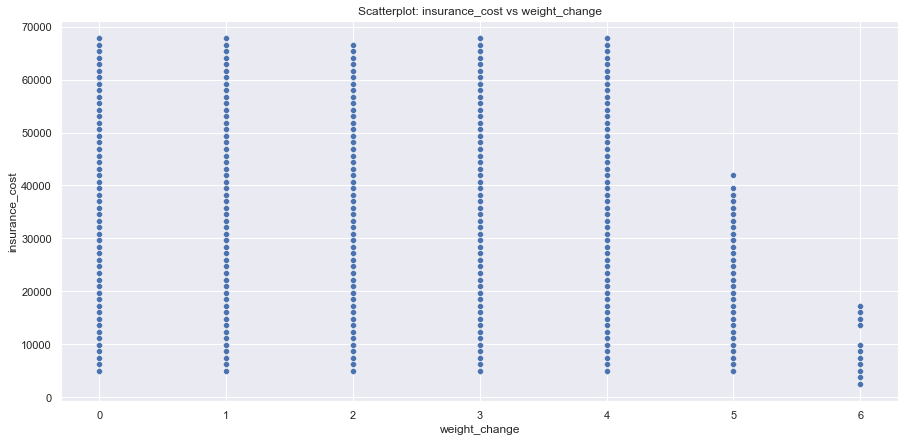

In [28]:
# Scatterplot of insurance_cost vs weight_change
plt.figure(figsize = (15,7))
plt.title('Scatterplot: insurance_cost vs weight_change');
sns.scatterplot(data=df,y='insurance_cost',x='weight_change');

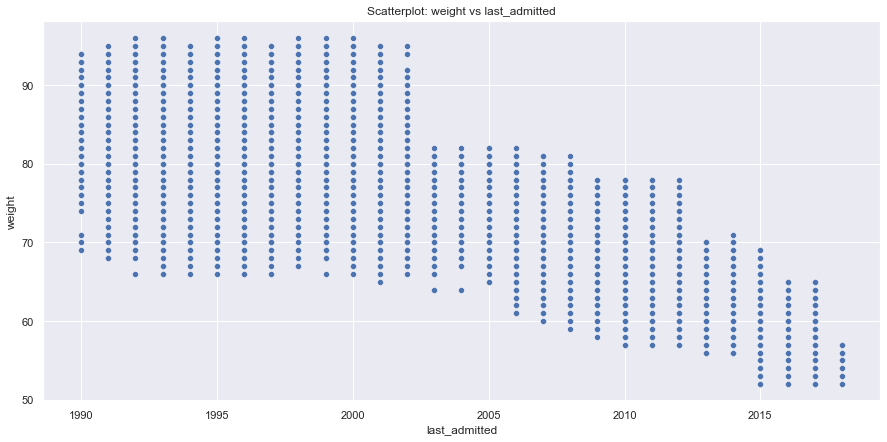

In [29]:
# Scatterplot of weight vs last_admitted
plt.figure(figsize = (15,7))
plt.title('Scatterplot: weight vs last_admitted');
sns.scatterplot(data=df,y='weight',x='last_admitted');

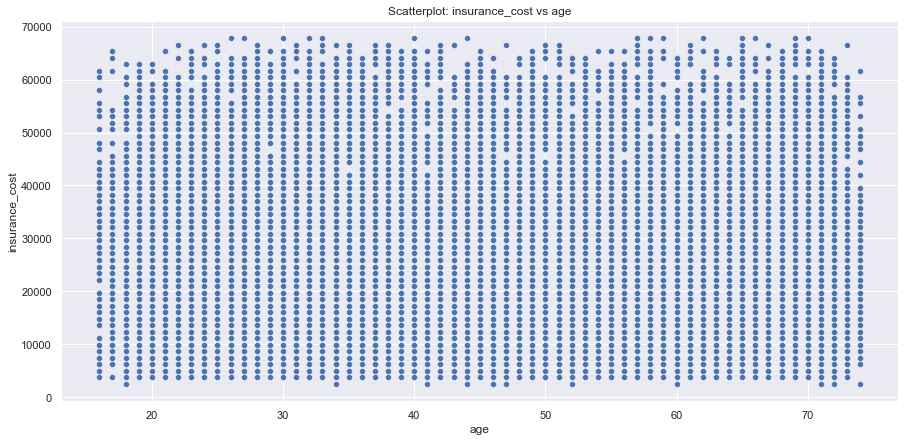

In [30]:
# Scatterplot of insurance_cost vs age
plt.figure(figsize = (15,7))
plt.title('Scatterplot: insurance_cost vs age');
sns.scatterplot(data=df,y='insurance_cost',x='age');

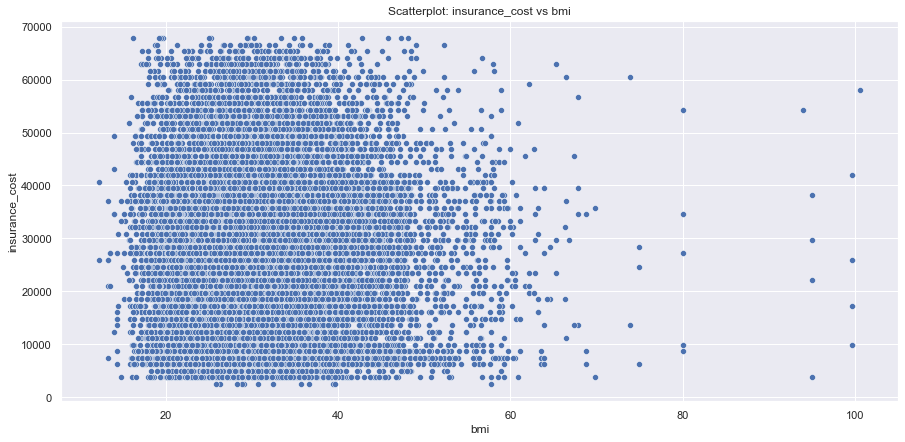

In [31]:
# Scatterplot of insurance_cost vs bmi
plt.figure(figsize = (15,7))
plt.title('Scatterplot: insurance_cost vs bmi');
sns.scatterplot(data=df,y='insurance_cost',x='bmi');

### Missing Value treatment

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  25000 non-null  int64  
 1   checkup_count       25000 non-null  int64  
 2   adventure_sports    25000 non-null  int64  
 3   Occupation          25000 non-null  object 
 4   consultation_count  25000 non-null  int64  
 5   cholesterol_level   25000 non-null  object 
 6   avg_steps           25000 non-null  int64  
 7   age                 25000 non-null  int64  
 8   heart_incident      25000 non-null  int64  
 9   decs_incident       25000 non-null  int64  
 10  Gender              25000 non-null  object 
 11  glucose_level       25000 non-null  int64  
 12  bmi                 24010 non-null  float64
 13  smoking_status      25000 non-null  object 
 14  last_admitted       13119 non-null  float64
 15  Location            25000 non-null  object 
 16  weig

In [33]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 12871


In [34]:
# remove the rows wilth null values in  bmi.

df.dropna(subset=['bmi'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  24010 non-null  int64  
 1   checkup_count       24010 non-null  int64  
 2   adventure_sports    24010 non-null  int64  
 3   Occupation          24010 non-null  object 
 4   consultation_count  24010 non-null  int64  
 5   cholesterol_level   24010 non-null  object 
 6   avg_steps           24010 non-null  int64  
 7   age                 24010 non-null  int64  
 8   heart_incident      24010 non-null  int64  
 9   decs_incident       24010 non-null  int64  
 10  Gender              24010 non-null  object 
 11  glucose_level       24010 non-null  int64  
 12  bmi                 24010 non-null  float64
 13  smoking_status      24010 non-null  object 
 14  last_admitted       12581 non-null  float64
 15  Location            24010 non-null  object 
 16  weig

In [35]:
# last_admitted columns have null values. This could mean those customers where never admitted.
print('Minimum of last_admitted: {}'.format(df['last_admitted'].min()));
print('Maximum of last_admitted: {}'.format(df['last_admitted'].max()));

Minimum of last_admitted: 1990.0
Maximum of last_admitted: 2018.0


In [36]:
# Lets set the last_admitted null values to year 0.
# Now we will convert it into 'int64' type.
df.last_admitted.fillna(0,inplace=True);
df.last_admitted = df.last_admitted.astype('int64');
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  24010 non-null  int64  
 1   checkup_count       24010 non-null  int64  
 2   adventure_sports    24010 non-null  int64  
 3   Occupation          24010 non-null  object 
 4   consultation_count  24010 non-null  int64  
 5   cholesterol_level   24010 non-null  object 
 6   avg_steps           24010 non-null  int64  
 7   age                 24010 non-null  int64  
 8   heart_incident      24010 non-null  int64  
 9   decs_incident       24010 non-null  int64  
 10  Gender              24010 non-null  object 
 11  glucose_level       24010 non-null  int64  
 12  bmi                 24010 non-null  float64
 13  smoking_status      24010 non-null  object 
 14  last_admitted       24010 non-null  int64  
 15  Location            24010 non-null  object 
 16  weig

In [37]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


## Variable transformation

In [38]:
# Lets replace the variables in heart_incident,decs_incident,adventure_sports -> 0 to 'N and 1 to 'Y'

In [39]:
df['heart_incident'].replace(to_replace=[0,1], value=['N','Y'],inplace=True);
df['decs_incident'].replace(to_replace=[0,1], value=['N','Y'],inplace=True);
df['adventure_sports'].replace(to_replace=[0,1], value=['N','Y'],inplace=True);

In [40]:
df['heart_incident'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
df['decs_incident'].unique()

array(['N', 'Y'], dtype=object)

In [42]:
df['adventure_sports'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  24010 non-null  int64  
 1   checkup_count       24010 non-null  int64  
 2   adventure_sports    24010 non-null  object 
 3   Occupation          24010 non-null  object 
 4   consultation_count  24010 non-null  int64  
 5   cholesterol_level   24010 non-null  object 
 6   avg_steps           24010 non-null  int64  
 7   age                 24010 non-null  int64  
 8   heart_incident      24010 non-null  object 
 9   decs_incident       24010 non-null  object 
 10  Gender              24010 non-null  object 
 11  glucose_level       24010 non-null  int64  
 12  bmi                 24010 non-null  float64
 13  smoking_status      24010 non-null  object 
 14  last_admitted       24010 non-null  int64  
 15  Location            24010 non-null  object 
 16  weig

In [44]:
# Check the range of numeric columns
df_num = pd.DataFrame()
for i in df.columns:
    if df[i].dtype not in ['object']:
        df_num[i] = df[i]


In [45]:
# Using standard scaler scale the numerical data and check the data summary
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled.describe().T

count          mean       std       min       25%  \
relationship_years  24010.0 -1.841648e-16  1.000021 -1.566540 -0.799601   
checkup_count       24010.0 -9.373686e-16  1.000021 -0.644512 -0.644512   
consultation_count  24010.0  2.922693e-16  1.000021 -2.716883 -0.967111   
avg_steps           24010.0  1.963583e-16  1.000021 -3.020180 -0.638672   
age                 24010.0 -1.622193e-16  1.000021 -1.797602 -0.865199   
glucose_level       24010.0 -8.946520e-17  1.000021 -1.762153 -0.869396   
bmi                 24010.0 -3.768285e-16  1.000021 -2.424128 -0.672052   
last_admitted       24010.0 -8.907077e-16  1.000021 -1.049173 -1.049173   
weight              24010.0  4.577300e-16  1.000021 -2.101957 -0.816304   
weight_change       24010.0 -5.929405e-16  1.000021 -1.490002 -0.898319   
fat_percentage      24010.0  3.210491e-16  1.000021 -2.064352 -0.906159   
insurance_cost      24010.0  1.556809e-16  1.000021 -1.722934 -0.775806   

                         50%       75%       max  
relationship_years -0.032661  0.734278  1.501218  
checkup_count      -0.644512  0.188493  3.520515  
consultation_count -0.092226  0.782660  7.781746  
avg_steps          -0.120417  0.488723  5.732264  
age                 0.005043  0.875286  1.807688  
glucose_level       0.007419  0.868292  1.745107  
bmi                -0.113419  0.534088  8.786620  
last_admitted       0.941235  0.953226  0.967215  
weight              0.040798  0.683624  2.612104  
weight_change       0.285048  0.876731  2.060098  
fat_percentage      0.252034  0.831130  1.526045  
insurance_cost     -0.000882  0.687939  2.840504

In [46]:
# Add the  categorical columns to this scaled dataset
for i in df.columns:
    if df[i].dtype in ['object']:
        df_scaled[i] = df[i]
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24010 entries, 0 to 24009
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  24010 non-null  float64
 1   checkup_count       24010 non-null  float64
 2   consultation_count  24010 non-null  float64
 3   avg_steps           24010 non-null  float64
 4   age                 24010 non-null  float64
 5   glucose_level       24010 non-null  float64
 6   bmi                 24010 non-null  float64
 7   last_admitted       24010 non-null  float64
 8   weight              24010 non-null  float64
 9   weight_change       24010 non-null  float64
 10  fat_percentage      24010 non-null  float64
 11  insurance_cost      24010 non-null  float64
 12  adventure_sports    23062 non-null  object 
 13  Occupation          23062 non-null  object 
 14  cholesterol_level   23062 non-null  object 
 15  heart_incident      23062 non-null  object 
 16  decs

In [47]:
# get dummy variables for the 11 categorical variables
df_conv = pd.get_dummies(df_scaled,columns =['adventure_sports','Occupation','cholesterol_level',
    'heart_incident','decs_incident','Gender','smoking_status','Location','other_insurers','Alcohol','exercise'],drop_first=True)
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24010 entries, 0 to 24009
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              24010 non-null  float64
 1   checkup_count                   24010 non-null  float64
 2   consultation_count              24010 non-null  float64
 3   avg_steps                       24010 non-null  float64
 4   age                             24010 non-null  float64
 5   glucose_level                   24010 non-null  float64
 6   bmi                             24010 non-null  float64
 7   last_admitted                   24010 non-null  float64
 8   weight                          24010 non-null  float64
 9   weight_change                   24010 non-null  float64
 10  fat_percentage                  24010 non-null  float64
 11  insurance_cost                  24010 non-null  float64
 12  adventure_sports_Y              

In [48]:
# Lets replace the ' ' in column names with '_'
df_conv.columns = df_conv.columns.str.replace(" ","_",regex=False)
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24010 entries, 0 to 24009
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              24010 non-null  float64
 1   checkup_count                   24010 non-null  float64
 2   consultation_count              24010 non-null  float64
 3   avg_steps                       24010 non-null  float64
 4   age                             24010 non-null  float64
 5   glucose_level                   24010 non-null  float64
 6   bmi                             24010 non-null  float64
 7   last_admitted                   24010 non-null  float64
 8   weight                          24010 non-null  float64
 9   weight_change                   24010 non-null  float64
 10  fat_percentage                  24010 non-null  float64
 11  insurance_cost                  24010 non-null  float64
 12  adventure_sports_Y              

# K Means clustering

In [49]:
# We have the scaled dataset df_conv. Lets run Kmeans for 2 to 7 clusters and check cluster inertia and silhoutte scores
wss = []
silh_score =[]
for i in range(2,8):
    k = KMeans(n_clusters=i)
    kcluster = k.fit(df_conv)
    wss.append(kcluster.inertia_)
    s_score=silhouette_score(df_conv,kcluster.labels_)
    silh_score.append(s_score)

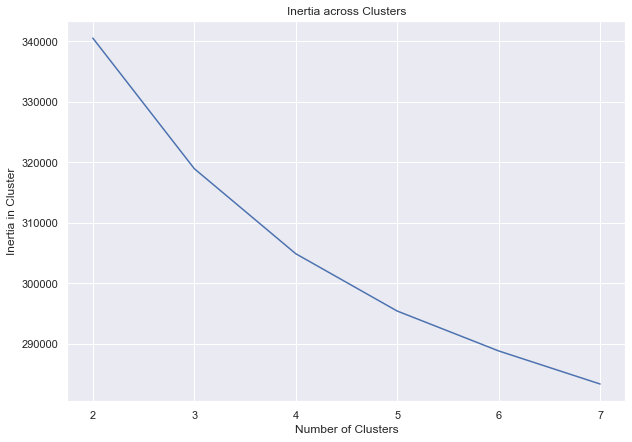

In [50]:
# Lets plot the within sum of squares of centroid or the cluster inertia
plt.figure(figsize=(10,7))
plt.plot(range(2,8),wss);
plt.xlabel("Number of Clusters");
plt.ylabel("Inertia in Cluster");
plt.title("Inertia across Clusters");

[0.09312443038189668,
 0.08519414283347428,
 0.08753837645863749,
 0.07627806192229934,
 0.06843566933949137,
 0.06774496488972086]

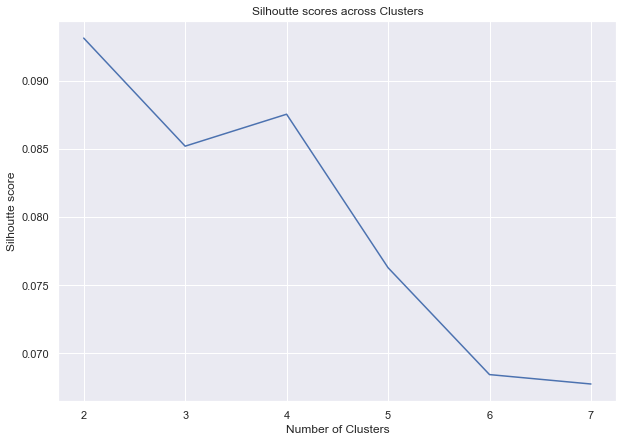

In [51]:
# Lets plot the silhoutte scores of the clusters
plt.figure(figsize=(10,7))
plt.plot(range(2,8),silh_score)
plt.xlabel("Number of Clusters");
plt.ylabel("Silhoutte score");
plt.title("Silhoutte scores across Clusters");
silh_score

In [52]:
#Lets look at the silhoutte score and width of clusters 3,4,5 and 6

for i in range(3,7):
    k_means = KMeans(n_clusters= i)
    cluster = k_means.fit(df_conv)
    labeli  = cluster.labels_
    sscore = silhouette_score(df_conv,labeli)
    ssmin = silhouette_samples(df_conv,labeli).min()
    print ('for {} cluster - sscore :{} , ssmin:{}'.format(i,sscore,ssmin))

for 3 cluster - sscore :0.08518201993902082 , ssmin:-0.033513066355420285
for 4 cluster - sscore :0.0876039871748286 , ssmin:-0.03175037863451493
for 5 cluster - sscore :0.07630929980285774 , ssmin:-0.038149386533829585
for 6 cluster - sscore :0.06845202277229143 , ssmin:-0.03797924093759372


In [53]:
k_means = KMeans(n_clusters= 4)
cluster = k_means.fit(df_conv)
# Copy clusters as a new column to original dataset
df_KMeans = df.copy()
df_KMeans['KMeans_cluster'] = cluster.labels_
df_KMeans.head()

relationship_years  checkup_count adventure_sports Occupation  \
0                   3              1                Y    Salried   
1                   0              0                N    Student   
2                   1              0                N   Business   
3                   7              4                N   Business   
4                   3              1                N    Student   

   consultation_count cholesterol_level  avg_steps  age heart_incident  \
0                   2        125 to 150       4866   28              Y   
1                   4        150 to 175       6411   50              N   
2                   4        200 to 225       4509   68              N   
3                   2        175 to 200       6214   51              N   
4                   2        150 to 175       4938   44              N   

  decs_incident  ... last_admitted   Location  weight other_insurers  Alcohol  \
0             N  ...             0    Chennai      67              N     Rare   
1             N  ...             0     Jaipur      58              N     Rare   
2             N  ...             0     Jaipur      73              N    Daily   
3             N  ...             0    Chennai      71              Y     Rare   
4             Y  ...          2004  Bangalore      74              N       No   

   exercise  weight_change fat_percentage insurance_cost KMeans_cluster  
0  Moderate              1             25          20978              0  
1  Moderate              3             27           6170              2  
2   Extreme              0             32          28382              0  
3        No              3             37          27148              1  
4   Extreme              0             34          29616              3  

[5 rows x 24 columns]

In [54]:
# Lets try to profile the clusters based on means of variables.
KMeans_profile=df_KMeans.groupby('KMeans_cluster').mean()
KMeans_profile['Frequency']=df_KMeans.KMeans_cluster.value_counts().sort_index()
KMeans_profile.T

KMeans_cluster                 0             1             2             3
relationship_years      1.211442      4.431907      4.386700      5.577960
checkup_count           0.394548      2.985214      0.394276      0.292511
consultation_count      3.095588      3.102983      3.063805      3.141452
avg_steps            5216.714849   5187.800778   5233.218182   5215.903114
age                    44.417504     45.630869     44.886700     44.946869
glucose_level         165.600072    171.956420    167.974242    166.507813
bmi                    31.448942     31.294656     31.621717     31.244426
last_admitted           0.000000    325.533333   1201.371886   1946.949994
weight                 75.732604     68.139300     61.066498     77.772890
weight_change           1.970588      2.281971      4.018519      1.945596
fat_percentage         28.890423     28.660960     28.970034     28.753212
insurance_cost      33140.512912  20898.934371  11523.981145  36846.591504
Frequency            5576.000000   3855.000000   5940.000000   8639.000000

In [55]:
# Lets take the original dataset and add KMEANS_cluster and then do train-test split to ensure the share
# of clusters remain same in train and test
df_model = df.copy()
df_model['KMeans_cluster'] = cluster.labels_
df_model.head()

relationship_years  checkup_count adventure_sports Occupation  \
0                   3              1                Y    Salried   
1                   0              0                N    Student   
2                   1              0                N   Business   
3                   7              4                N   Business   
4                   3              1                N    Student   

   consultation_count cholesterol_level  avg_steps  age heart_incident  \
0                   2        125 to 150       4866   28              Y   
1                   4        150 to 175       6411   50              N   
2                   4        200 to 225       4509   68              N   
3                   2        175 to 200       6214   51              N   
4                   2        150 to 175       4938   44              N   

  decs_incident  ... last_admitted   Location  weight other_insurers  Alcohol  \
0             N  ...             0    Chennai      67              N     Rare   
1             N  ...             0     Jaipur      58              N     Rare   
2             N  ...             0     Jaipur      73              N    Daily   
3             N  ...             0    Chennai      71              Y     Rare   
4             Y  ...          2004  Bangalore      74              N       No   

   exercise  weight_change fat_percentage insurance_cost KMeans_cluster  
0  Moderate              1             25          20978              0  
1  Moderate              3             27           6170              2  
2   Extreme              0             32          28382              0  
3        No              3             37          27148              1  
4   Extreme              0             34          29616              3  

[5 rows x 24 columns]

In [56]:
# Next we will do train test split with KMeans_cluster as target and post the split do the scaling

X_Kmeans = df_model.drop('KMeans_cluster', axis=1) 
y_Kmeans = df_model.pop('KMeans_cluster')

# Apply train-test split in the ratio 70:30
X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(X_Kmeans, y_Kmeans, test_size=0.3 , random_state=1,stratify=y_Kmeans)

In [57]:
y_train_K.value_counts(normalize=True)

3    0.359791
2    0.247397
0    0.232225
1    0.160588
Name: KMeans_cluster, dtype: float64

In [58]:
y_test_K.value_counts(normalize=True)

3    0.359850
2    0.247397
0    0.232264
1    0.160489
Name: KMeans_cluster, dtype: float64

In [59]:
# Next we will standardize the data in X_train_K and X_test_K
# get the numeric columns in X_train_K and X_test_K
X_train_K_num = pd.DataFrame()
for i in X_train_K.columns:
    if X_train_K[i].dtype not in ['object']:
        X_train_K_num[i] = X_train_K[i];
X_test_K_num = pd.DataFrame()
for i in X_test_K.columns:
    if X_test_K[i].dtype not in ['object']:
        X_test_K_num[i] = X_test_K[i];

In [60]:
# Using standard scaler scale the numerical data and check the data summary
scaler = StandardScaler()
X_train1 = pd.DataFrame(scaler.fit_transform(X_train_K_num),columns = X_train_K_num.columns)
X_test1 = pd.DataFrame(scaler.transform(X_test_K_num),columns = X_test_K_num.columns)

In [61]:
X_train = X_train1.drop('insurance_cost', axis=1)
X_test = X_test1.drop('insurance_cost', axis=1) 
y_train = X_train1.pop('insurance_cost')
y_test = X_test1.pop('insurance_cost')

In [62]:
# Add the categorical columns to train and test dataframe.
for i in X_train_K.columns:
    if X_train_K[i].dtype in ['object']:
        X_train[i] = X_train_K[i]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16807 entries, 0 to 16806
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  16807 non-null  float64
 1   checkup_count       16807 non-null  float64
 2   consultation_count  16807 non-null  float64
 3   avg_steps           16807 non-null  float64
 4   age                 16807 non-null  float64
 5   glucose_level       16807 non-null  float64
 6   bmi                 16807 non-null  float64
 7   last_admitted       16807 non-null  float64
 8   weight              16807 non-null  float64
 9   weight_change       16807 non-null  float64
 10  fat_percentage      16807 non-null  float64
 11  adventure_sports    11314 non-null  object 
 12  Occupation          11314 non-null  object 
 13  cholesterol_level   11314 non-null  object 
 14  heart_incident      11314 non-null  object 
 15  decs_incident       11314 non-null  object 
 16  Gend

In [63]:
for i in X_test_K.columns:
    if X_test_K[i].dtype in ['object']:
        X_test[i] = X_test_K[i]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationship_years  7203 non-null   float64
 1   checkup_count       7203 non-null   float64
 2   consultation_count  7203 non-null   float64
 3   avg_steps           7203 non-null   float64
 4   age                 7203 non-null   float64
 5   glucose_level       7203 non-null   float64
 6   bmi                 7203 non-null   float64
 7   last_admitted       7203 non-null   float64
 8   weight              7203 non-null   float64
 9   weight_change       7203 non-null   float64
 10  fat_percentage      7203 non-null   float64
 11  adventure_sports    2064 non-null   object 
 12  Occupation          2064 non-null   object 
 13  cholesterol_level   2064 non-null   object 
 14  heart_incident      2064 non-null   object 
 15  decs_incident       2064 non-null   object 
 16  Gender

In [64]:
# get dummy variables for the 11 categorical variables
X_train = pd.get_dummies(X_train,columns =['adventure_sports','Occupation','cholesterol_level',
    'heart_incident','decs_incident','Gender','smoking_status','Location','other_insurers','Alcohol','exercise'],drop_first=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16807 entries, 0 to 16806
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              16807 non-null  float64
 1   checkup_count                   16807 non-null  float64
 2   consultation_count              16807 non-null  float64
 3   avg_steps                       16807 non-null  float64
 4   age                             16807 non-null  float64
 5   glucose_level                   16807 non-null  float64
 6   bmi                             16807 non-null  float64
 7   last_admitted                   16807 non-null  float64
 8   weight                          16807 non-null  float64
 9   weight_change                   16807 non-null  float64
 10  fat_percentage                  16807 non-null  float64
 11  adventure_sports_Y              16807 non-null  uint8  
 12  Occupation_Salried              

In [65]:
X_test = pd.get_dummies(X_test,columns =['adventure_sports','Occupation','cholesterol_level',
    'heart_incident','decs_incident','Gender','smoking_status','Location','other_insurers','Alcohol','exercise'],drop_first=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              7203 non-null   float64
 1   checkup_count                   7203 non-null   float64
 2   consultation_count              7203 non-null   float64
 3   avg_steps                       7203 non-null   float64
 4   age                             7203 non-null   float64
 5   glucose_level                   7203 non-null   float64
 6   bmi                             7203 non-null   float64
 7   last_admitted                   7203 non-null   float64
 8   weight                          7203 non-null   float64
 9   weight_change                   7203 non-null   float64
 10  fat_percentage                  7203 non-null   float64
 11  adventure_sports_Y              7203 non-null   uint8  
 12  Occupation_Salried              72

In [66]:
# Lets replace the ' ' in column names with '_'
X_train.columns = X_train.columns.str.replace(" ","_",regex=False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16807 entries, 0 to 16806
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              16807 non-null  float64
 1   checkup_count                   16807 non-null  float64
 2   consultation_count              16807 non-null  float64
 3   avg_steps                       16807 non-null  float64
 4   age                             16807 non-null  float64
 5   glucose_level                   16807 non-null  float64
 6   bmi                             16807 non-null  float64
 7   last_admitted                   16807 non-null  float64
 8   weight                          16807 non-null  float64
 9   weight_change                   16807 non-null  float64
 10  fat_percentage                  16807 non-null  float64
 11  adventure_sports_Y              16807 non-null  uint8  
 12  Occupation_Salried              

In [67]:
# Lets replace the ' ' in column names with '_'
X_test.columns = X_test.columns.str.replace(" ","_",regex=False)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   relationship_years              7203 non-null   float64
 1   checkup_count                   7203 non-null   float64
 2   consultation_count              7203 non-null   float64
 3   avg_steps                       7203 non-null   float64
 4   age                             7203 non-null   float64
 5   glucose_level                   7203 non-null   float64
 6   bmi                             7203 non-null   float64
 7   last_admitted                   7203 non-null   float64
 8   weight                          7203 non-null   float64
 9   weight_change                   7203 non-null   float64
 10  fat_percentage                  7203 non-null   float64
 11  adventure_sports_Y              7203 non-null   uint8  
 12  Occupation_Salried              72

In [172]:
#Function to calculate the model metrics
def metrics_function(y,yhat):
    mae = round(metrics.mean_absolute_error(y, yhat),4)
    mape = round(metrics.mean_absolute_percentage_error(y, yhat),4)
    mse = round(metrics.mean_squared_error(y, yhat),4)
    rmse = round(np.sqrt(mse) ,4)
    r2 = round(metrics.r2_score(y,yhat),4)
    return mae,mape,mse,rmse,r2

## Linear Regression

In [153]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [155]:
# R square on training data
lr_model.score(X_train,y_train)

0.9439547167770493

In [156]:
# R square on testing data
lr_model.score(X_test,y_test)

0.9440421432125553

In [157]:
#RMSE on Training data
predicted_train = lr_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.23673885026110666

In [158]:
#RMSE on Testing data
predicted_test = lr_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.23832920599550392

In [179]:
# Lets see statsmodel ols method on the training data. We will concatenate teh predictor and target variable
data_train = pd.concat([X_train,y_train],axis = 1)
data_test = pd.concat([X_test,y_test],axis = 1)

In [180]:
# Check the colun names
data_train.columns

Index(['relationship_years', 'checkup_count', 'consultation_count',
       'avg_steps', 'age', 'glucose_level', 'bmi', 'last_admitted', 'weight',
       'weight_change', 'fat_percentage', 'adventure_sports_Y',
       'Occupation_Salried', 'Occupation_Student',
       'cholesterol_level_150_to_175', 'cholesterol_level_175_to_200',
       'cholesterol_level_200_to_225', 'cholesterol_level_225_to_250',
       'heart_incident_Y', 'decs_incident_Y', 'Gender_Male',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'Location_Bangalore', 'Location_Bhubaneswar',
       'Location_Chennai', 'Location_Delhi', 'Location_Guwahati',
       'Location_Jaipur', 'Location_Kanpur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mangalore', 'Location_Mumbai',
       'Location_Nagpur', 'Location_Pune', 'Location_Surat',
       'other_insurers_Y', 'Alcohol_No', 'Alcohol_Rare', 'exercise_Moderate',
       'exercise_No', 'insurance_cost'],
      d

In [181]:
# ols model fit for training data
formula = 'insurance_cost ~ relationship_years+checkup_count+consultation_count+avg_steps+age+glucose_level+bmi+last_admitted+weight+weight_change+fat_percentage+adventure_sports_Y+Occupation_Salried+Occupation_Student+cholesterol_level_150_to_175+cholesterol_level_175_to_200+cholesterol_level_200_to_225+cholesterol_level_225_to_250+heart_incident_Y+decs_incident_Y+Gender_Male+smoking_status_formerly_smoked+smoking_status_never_smoked+smoking_status_smokes+Location_Bangalore+Location_Bhubaneswar+Location_Chennai+Location_Delhi+Location_Guwahati+Location_Jaipur+Location_Kanpur+Location_Kolkata+Location_Lucknow+Location_Mangalore+Location_Mumbai+Location_Nagpur+Location_Pune+Location_Surat+other_insurers_Y+Alcohol_No+Alcohol_Rare+exercise_Moderate+exercise_No'
lm_model = ols(formula=formula,data=data_train).fit
print(lm_model.summary())
R2_adj_train = lm_model.rsquared_adj 
print("The Adjusted R2 for the model on training data is {}".format(R2_adj_train))

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     6566.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:10:09   Log-Likelihood:                 367.39
No. Observations:               16807   AIC:                            -646.8
Df Residuals:                   16763   BIC:                            -306.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [183]:
# ols model fit for training data
formula = 'insurance_cost ~ relationship_years+checkup_count+age+last_admitted+weight+weight_change'
lm_model = ols(formula=formula,data=data_train).fit
print(lm_model.summary())
R2_adj_train = lm_model.rsquared_adj 
print("The Adjusted R2 for the model on training data is {}".format(R2_adj_train))

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 4.709e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:15:14   Log-Likelihood:                 355.18
No. Observations:               16807   AIC:                            -696.4
Df Residuals:                   16800   BIC:                            -642.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.078e-16      0

In [185]:
predicted_train=lm_model.predict(X_train)
predicted_test =lm_model.predict(X_test)

In [186]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-lr_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [187]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-lr_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [188]:
train_metrics

[0.9438, 0.9439, 0.2369, 0.191, 2.3048, 0.0561]

In [189]:
test_metrics

[0.9437, 0.9441, 0.2383, 0.1931, 2.3991, 0.0568]

In [ ]:
lm_model.

In [190]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics = pd.DataFrame(train_metrics,index = ['Adj R-square','R-square','RMSE','MAE','MAPE','MSE'],
                            columns=['Linear_Train'])
model_metrics['Linear_Test'] = test_metrics
model_metrics

Linear_Train  Linear_Test
Adj R-square        0.9438       0.9437
R-square            0.9439       0.9441
RMSE                0.2369       0.2383
MAE                 0.1910       0.1931
MAPE                2.3048       2.3991
MSE                 0.0561       0.0568

## Lasso

In [113]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)

In [114]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [115]:
# R square on training data
lasso_model.score(X_train,y_train)

0.9316140387680133

In [116]:
# R square on testing data
lasso_model.score(X_test,y_test)

0.9319931196757381

In [117]:
#RMSE on Training data
predicted_train = lasso_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.26150709594958743

In [118]:
#RMSE on Testing data
predicted_test = lasso.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2627381613398982

In [191]:
#Lets do gridsearch to hypertune the parameters
lasso_grid = Lasso()

param_grid = { 'alpha' : [0.005, 0.02, 0.03, 0.05, 0.06,0.1,0.2,0.3] }

grid_search = GridSearchCV(estimator = lasso_grid,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.2,
                                   0.3]})

In [192]:
grid_search.best_estimator_

Lasso(alpha=0.005)

In [193]:
lasso_grid=grid_search.best_estimator_

In [351]:
# Lets find the features considered by lasso 
lasso_feature = pd.DataFrame()
lasso_feature['Feature'] = X_train.columns
lasso_feature['Coefficient'] = lasso_grid.coef_
lasso_feature[lasso_feature['Coefficient'] != 0]

Feature  Coefficient
1  checkup_count    -0.026747
7  last_admitted     0.020778
8         weight     0.962811
9  weight_change     0.010050

In [194]:
predicted_train=lasso_grid.predict(X_train)
predicted_test =lasso_grid.predict(X_test)

In [195]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-lasso_grid.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [196]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-lasso_grid.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [197]:
train_metrics

[0.9436, 0.9437, 0.2373, 0.1909, 2.2853, 0.0563]

In [198]:
test_metrics

[0.9436, 0.944, 0.2385, 0.193, 2.3758, 0.0569]

In [199]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics['Lasso_Train'] = train_metrics
model_metrics['Lasso_Test'] = test_metrics
model_metrics

Linear_Train  Linear_Test  Lasso_Train  Lasso_Test
Adj R-square        0.9438       0.9437       0.9436      0.9436
R-square            0.9439       0.9441       0.9437      0.9440
RMSE                0.2369       0.2383       0.2373      0.2385
MAE                 0.1910       0.1931       0.1909      0.1930
MAPE                2.3048       2.3991       2.2853      2.3758
MSE                 0.0561       0.0568       0.0563      0.0569

In [415]:
model_metrics[['Lasso_Train','Lasso_Test']]

Lasso_Train  Lasso_Test
Adj R-square       0.9436      0.9436
R-square           0.9437      0.9440
RMSE               0.2373      0.2385
MAE                0.1909      0.1930
MAPE               2.2853      2.3758
MSE                0.0563      0.0569

## Ridge

In [120]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)

In [121]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [122]:
# R square on training data
ridge_model.score(X_train,y_train)

0.9439547167202744

In [123]:
# R square on testing data
ridge_model.score(X_test,y_test)

0.9440421829424097

In [124]:
#RMSE on Training data
predicted_train = ridge_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.23673885038101694

In [125]:
#RMSE on Testing data
predicted_test = ridge_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.23832912138909776

In [223]:
#Lets do gridsearch to hypertune the parameters
ridge_grid = Ridge()

param_grid = { 'alpha' : [1,3,5,10,20,30,40,50,100] }

grid_search = GridSearchCV(estimator = ridge_grid,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 3, 5, 10, 20, 30, 40, 50, 100]})

In [224]:
grid_search.best_estimator_

Ridge(alpha=30)

In [225]:
#Lets do gridsearch to hypertune the parameters
ridge_grid = Ridge()

param_grid = { 'alpha' : [25,26,27,28,29,30,31,32,33,34,35] }

grid_search = GridSearchCV(estimator = ridge_grid,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]})

In [226]:
grid_search.best_estimator_

Ridge(alpha=32)

In [227]:
ridge_grid=grid_search.best_estimator_

In [362]:
# Lets find the features considered by lasso 
ridge_feature = pd.DataFrame()
ridge_feature['Feature'] = X_train.columns
ridge_feature['Coefficient'] = ridge_grid.coef_
ridge_feature['Coefficient_abs'] = abs(ridge_feature['Coefficient'])
ridge_feature.sort_values('Coefficient_abs',ascending=False)

Feature  Coefficient  Coefficient_abs
8                           weight     0.966873         0.966873
7                    last_admitted     0.029083         0.029083
1                    checkup_count    -0.028639         0.028639
32                Location_Lucknow     0.017216         0.017216
9                    weight_change     0.016505         0.016505
29                 Location_Jaipur     0.015653         0.015653
26                Location_Chennai     0.015472         0.015472
36                   Location_Pune     0.014322         0.014322
28               Location_Guwahati     0.011334         0.011334
31                Location_Kolkata     0.010696         0.010696
23           smoking_status_smokes     0.009520         0.009520
33              Location_Mangalore     0.008352         0.008352
0               relationship_years    -0.008104         0.008104
27                  Location_Delhi     0.008050         0.008050
30                 Location_Kanpur     0.007933         0.007933
22     smoking_status_never_smoked     0.006549         0.006549
37                  Location_Surat     0.006129         0.006129
17    cholesterol_level_225_to_250    -0.006111         0.006111
12              Occupation_Salried     0.006089         0.006089
38                other_insurers_Y    -0.005863         0.005863
35                 Location_Nagpur     0.005714         0.005714
20                     Gender_Male    -0.005379         0.005379
11              adventure_sports_Y     0.004897         0.004897
25            Location_Bhubaneswar    -0.004523         0.004523
4                              age     0.004370         0.004370
14    cholesterol_level_150_to_175     0.003950         0.003950
42                     exercise_No    -0.003874         0.003874
15    cholesterol_level_175_to_200     0.003702         0.003702
2               consultation_count    -0.003251         0.003251
21  smoking_status_formerly_smoked     0.003117         0.003117
16    cholesterol_level_200_to_225    -0.002698         0.002698
41               exercise_Moderate    -0.002543         0.002543
18                heart_incident_Y    -0.001884         0.001884
39                      Alcohol_No     0.001867         0.001867
19                 decs_incident_Y     0.001565         0.001565
13              Occupation_Student    -0.001413         0.001413
40                    Alcohol_Rare    -0.001352         0.001352
6                              bmi    -0.001300         0.001300
24              Location_Bangalore     0.000822         0.000822
5                    glucose_level     0.000681         0.000681
10                  fat_percentage    -0.000457         0.000457
3                        avg_steps    -0.000375         0.000375
34                 Location_Mumbai     0.000216         0.000216

In [228]:
predicted_train=ridge_grid.predict(X_train)
predicted_test =ridge_grid.predict(X_test)

In [229]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-ridge_grid.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [230]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-ridge_grid.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [231]:
train_metrics

[0.9438, 0.9439, 0.2369, 0.1908, 2.2981, 0.0561]

In [232]:
test_metrics

[0.9437, 0.944, 0.2383, 0.193, 2.3896, 0.0568]

In [233]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics['Ridge_Train'] = train_metrics
model_metrics['Ridge_Test'] = test_metrics
model_metrics

Linear_Train  Linear_Test  Lasso_Train  Lasso_Test  Ridge_Train  \
Adj R-square        0.9438       0.9437       0.9436      0.9436       0.9438   
R-square            0.9439       0.9441       0.9437      0.9440       0.9439   
RMSE                0.2369       0.2383       0.2373      0.2385       0.2369   
MAE                 0.1910       0.1931       0.1909      0.1930       0.1908   
MAPE                2.3048       2.3991       2.2853      2.3758       2.2981   
MSE                 0.0561       0.0568       0.0563      0.0569       0.0561   

              Ridge_Test  
Adj R-square      0.9437  
R-square          0.9440  
RMSE              0.2383  
MAE               0.1930  
MAPE              2.3896  
MSE               0.0568

In [416]:
model_metrics[['Ridge_Train','Ridge_Test']]

Ridge_Train  Ridge_Test
Adj R-square       0.9438      0.9437
R-square           0.9439      0.9440
RMSE               0.2369      0.2383
MAE                0.1908      0.1930
MAPE               2.2981      2.3896
MSE                0.0561      0.0568

## Decision Tree

In [375]:
# Lets use grid searchcv to see if the model improves with different input parameters
dtr_model = DecisionTreeRegressor(random_state=123)

param_grid = { 'criterion' : ['mse','friedman_mse', 'mae'],
               'max_depth' : [40,50,60],
               'min_samples_leaf' : [50,100,150],
               'min_samples_split' : [150,300,450]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'criterion': ['mse'], 'max_depth': [40, 50, 60],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [376]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=40, min_samples_leaf=50, min_samples_split=300,
                      random_state=123)

In [379]:
dtr_model = DecisionTreeRegressor(random_state=123)

param_grid = { 'max_depth' : [15,20,25,40],
               'min_samples_leaf' : [35,40,45,50],
               'min_samples_split' : [200,250,300]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [15, 20, 25, 40],
                         'min_samples_leaf': [35, 40, 45, 50],
                         'min_samples_split': [200, 250, 300]})

In [380]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=35, min_samples_split=250,
                      random_state=123)

In [385]:
dtr_model = DecisionTreeRegressor(random_state=123)

param_grid = { 'max_depth' : [5,10,15,20],
               'min_samples_leaf' : [30,35,40],
               'min_samples_split' : [225,250,275]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [30, 35, 40],
                         'min_samples_split': [225, 250, 275]})

In [386]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=35, min_samples_split=250,
                      random_state=123)

In [387]:
dtr_model = grid_search.best_estimator_

In [396]:
# Lets find the features considered by DecisionTree 
dtr_feature = pd.DataFrame()
dtr_feature['Feature'] = X_train.columns
dtr_feature['Coefficient'] = dtr_model.feature_importances_
dtr_feature.sort_values('Coefficient',ascending=False)

Feature  Coefficient
8                           weight     0.995037
7                    last_admitted     0.002413
1                    checkup_count     0.001052
9                    weight_change     0.000718
0               relationship_years     0.000281
4                              age     0.000171
3                        avg_steps     0.000094
5                    glucose_level     0.000073
6                              bmi     0.000070
13              Occupation_Student     0.000027
40                    Alcohol_Rare     0.000021
42                     exercise_No     0.000017
2               consultation_count     0.000014
38                other_insurers_Y     0.000012
12              Occupation_Salried     0.000000
28               Location_Guwahati     0.000000
41               exercise_Moderate     0.000000
39                      Alcohol_No     0.000000
37                  Location_Surat     0.000000
36                   Location_Pune     0.000000
35                 Location_Nagpur     0.000000
34                 Location_Mumbai     0.000000
33              Location_Mangalore     0.000000
32                Location_Lucknow     0.000000
31                Location_Kolkata     0.000000
30                 Location_Kanpur     0.000000
29                 Location_Jaipur     0.000000
27                  Location_Delhi     0.000000
11              adventure_sports_Y     0.000000
26                Location_Chennai     0.000000
25            Location_Bhubaneswar     0.000000
24              Location_Bangalore     0.000000
23           smoking_status_smokes     0.000000
22     smoking_status_never_smoked     0.000000
10                  fat_percentage     0.000000
20                     Gender_Male     0.000000
19                 decs_incident_Y     0.000000
18                heart_incident_Y     0.000000
17    cholesterol_level_225_to_250     0.000000
16    cholesterol_level_200_to_225     0.000000
15    cholesterol_level_175_to_200     0.000000
14    cholesterol_level_150_to_175     0.000000
21  smoking_status_formerly_smoked     0.000000

In [388]:
predicted_train=dtr_model.predict(X_train)
predicted_test =dtr_model.predict(X_test)

In [389]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-dtr_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [390]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-dtr_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [391]:
train_metrics

[0.9558, 0.9559, 0.21, 0.1672, 2.1955, 0.0441]

In [392]:
test_metrics

[0.953, 0.9533, 0.2177, 0.1732, 2.3356, 0.0474]

In [394]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics['DecisionTree_Train'] = train_metrics
model_metrics['DecisionTree_Test'] = test_metrics
model_metrics[['DecisionTree_Train','DecisionTree_Test']]

DecisionTree_Train  DecisionTree_Test
Adj R-square              0.9558             0.9530
R-square                  0.9559             0.9533
RMSE                      0.2100             0.2177
MAE                       0.1672             0.1732
MAPE                      2.1955             2.3356
MSE                       0.0441             0.0474

## Artificial Neural Network

In [250]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(activation='relu', solver='adam', max_iter=500)

In [251]:
mlp.fit(X_train,y_train)

MLPRegressor(max_iter=500)

In [252]:
mlp.score(X_train,y_train)

0.9627542815024922

In [253]:
mlp.score(X_test,y_test)

0.9437223089490648

In [254]:
#RMSE on Training data
predicted_train = mlp.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.19299149851096498

In [255]:
#RMSE on Testing data
predicted_test = mlp.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2390093360162671

In [256]:
mlp_model = MLPRegressor(random_state=123,max_iter=500)

param_grid = {"hidden_layer_sizes": [(1,),(2,),(3,),(4,),(5,)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["sgd", "adam"], 
              "alpha": [0.00005,0.0005]}

grid_search = GridSearchCV(estimator = mlp_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=123),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,)],
                         'solver': ['sgd', 'adam']})

In [257]:
grid_search.best_estimator_

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1,), max_iter=500,
             random_state=123)

In [260]:
mlp_model = MLPRegressor(random_state=123,max_iter=500)

param_grid = {"hidden_layer_sizes": [(1,),(100,)], 
              "alpha": [0.0005,0.001,0.01,0.1]}

grid_search = GridSearchCV(estimator = mlp_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=123),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(1,), (100,)]})

In [261]:
grid_search.best_estimator_

MLPRegressor(alpha=0.01, hidden_layer_sizes=(1,), max_iter=500,
             random_state=123)

In [264]:
mlp_model = grid_search.best_estimator_

In [265]:
mlp_model.fit(X_train,y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(1,), max_iter=500,
             random_state=123)

In [401]:
predicted_train=mlp_model.predict(X_train)
predicted_test =mlp_model.predict(X_test)

In [400]:
# Lets find the features considered by ANN
mlp_feature = pd.DataFrame()
mlp_feature['Feature'] = X_train.columns
mlp_feature['Coefficient'] = mlp_model.coefs_[0]
mlp_feature['Coefficient_abs'] = abs(mlp_feature['Coefficient'])
mlp_feature.sort_values('Coefficient_abs',ascending=False)

Feature  Coefficient  Coefficient_abs
8                           weight     0.521760         0.521760
1                    checkup_count    -0.016430         0.016430
26                Location_Chennai     0.012820         0.012820
7                    last_admitted     0.011303         0.011303
32                Location_Lucknow     0.009940         0.009940
36                   Location_Pune     0.009918         0.009918
29                 Location_Jaipur     0.009812         0.009812
37                  Location_Surat     0.009269         0.009269
27                  Location_Delhi     0.009218         0.009218
31                Location_Kolkata     0.008339         0.008339
0               relationship_years    -0.007638         0.007638
33              Location_Mangalore     0.007189         0.007189
12              Occupation_Salried     0.006206         0.006206
23           smoking_status_smokes     0.005924         0.005924
42                     exercise_No    -0.005768         0.005768
30                 Location_Kanpur     0.005690         0.005690
28               Location_Guwahati     0.005413         0.005413
14    cholesterol_level_150_to_175     0.005195         0.005195
38                other_insurers_Y    -0.004639         0.004639
24              Location_Bangalore     0.004298         0.004298
17    cholesterol_level_225_to_250    -0.002911         0.002911
9                    weight_change    -0.002771         0.002771
22     smoking_status_never_smoked     0.002391         0.002391
11              adventure_sports_Y    -0.002159         0.002159
18                heart_incident_Y    -0.002136         0.002136
25            Location_Bhubaneswar     0.002044         0.002044
16    cholesterol_level_200_to_225     0.002017         0.002017
10                  fat_percentage     0.001874         0.001874
4                              age     0.001756         0.001756
39                      Alcohol_No     0.001699         0.001699
2               consultation_count    -0.001671         0.001671
34                 Location_Mumbai     0.001663         0.001663
21  smoking_status_formerly_smoked     0.001559         0.001559
20                     Gender_Male    -0.001542         0.001542
35                 Location_Nagpur     0.001522         0.001522
40                    Alcohol_Rare     0.001364         0.001364
19                 decs_incident_Y    -0.001268         0.001268
15    cholesterol_level_175_to_200     0.000966         0.000966
41               exercise_Moderate    -0.000950         0.000950
6                              bmi    -0.000886         0.000886
5                    glucose_level     0.000788         0.000788
3                        avg_steps     0.000671         0.000671
13              Occupation_Student    -0.000049         0.000049

In [402]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-mlp_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [403]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-mlp_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [404]:
train_metrics

[0.9503, 0.9504, 0.2227, 0.1806, 2.3652, 0.0496]

In [405]:
test_metrics

[0.9505, 0.9508, 0.2236, 0.1809, 2.4663, 0.05]

In [406]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics['ANN_Train'] = train_metrics
model_metrics['ANN_Test'] = test_metrics
model_metrics[['ANN_Train','ANN_Test']]

ANN_Train  ANN_Test
Adj R-square     0.9503    0.9505
R-square         0.9504    0.9508
RMSE             0.2227    0.2236
MAE              0.1806    0.1809
MAPE             2.3652    2.4663
MSE              0.0496    0.0500

## KNN Regression

In [272]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

In [273]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [274]:
knn_model.score(X_train,y_train)

0.8878206777007733

In [275]:
knn_model.score(X_test,y_test)

0.8341643454043339

In [276]:
#RMSE on Training data
predicted_train = knn_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.3349318173885942

In [278]:
#RMSE on Testing data
predicted_test = knn_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.41028504262049886

In [279]:
knn_model = KNeighborsRegressor()
param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']}
grid_search =GridSearchCV(estimator=knn_model,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [280]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=14, weights='distance')

In [281]:
knn_model = grid_search.best_estimator_

In [282]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=14, weights='distance')

In [283]:
predicted_train=knn_model.predict(X_train)
predicted_test =knn_model.predict(X_test)

In [284]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-knn_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [285]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-knn_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [286]:
train_metrics

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [287]:
test_metrics

[0.8543, 0.8552, 0.3834, 0.3031, 2.7761, 0.147]

In [288]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
model_metrics['KNN_Train'] = train_metrics
model_metrics['KNN_Test'] = test_metrics
model_metrics

Linear_Train  Linear_Test  Lasso_Train  Lasso_Test  Ridge_Train  \
Adj R-square        0.9438       0.9437       0.9436      0.9436       0.9438   
R-square            0.9439       0.9441       0.9437      0.9440       0.9439   
RMSE                0.2369       0.2383       0.2373      0.2385       0.2369   
MAE                 0.1910       0.1931       0.1909      0.1930       0.1908   
MAPE                2.3048       2.3991       2.2853      2.3758       2.2981   
MSE                 0.0561       0.0568       0.0563      0.0569       0.0561   

              Ridge_Test  DecisionTree_Train  DecisionTree_Test  ANN_Train  \
Adj R-square      0.9437              0.9550             0.9526     0.9503   
R-square          0.9440              0.9552             0.9529     0.9504   
RMSE              0.2383              0.2117             0.2186     0.2227   
MAE               0.1930              0.1690             0.1746     0.1806   
MAPE              2.3896              2.1993             2.3339     2.3652   
MSE               0.0568              0.0448             0.0478     0.0496   

              ANN_Test  KNN_Train  KNN_Test  
Adj R-square    0.9505        1.0    0.8543  
R-square        0.9508        1.0    0.8552  
RMSE            0.2236        0.0    0.3834  
MAE             0.1809        0.0    0.3031  
MAPE            2.4663        0.0    2.7761  
MSE             0.0500        0.0    0.1470

In [414]:
model_metrics[['KNN_Train','KNN_Test']]

KNN_Train  KNN_Test
Adj R-square        1.0    0.8543
R-square            1.0    0.8552
RMSE                0.0    0.3834
MAE                 0.0    0.3031
MAPE                0.0    2.7761
MSE                 0.0    0.1470

## Random Forest

In [292]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [293]:
predicted_train=rf_model.predict(X_train)
predicted_test =rf_model.predict(X_test)

In [294]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-rf_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [295]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-rf_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [296]:
train_metrics

[0.9933, 0.9933, 0.0819, 0.0643, 0.8628, 0.0067]

In [297]:
test_metrics

[0.9523, 0.9526, 0.2193, 0.174, 2.3278, 0.0481]

In [429]:
rf_model = RandomForestRegressor()
param_grid = { 'criterion' :['mse','mae']
               'max_depth' : [190,200,210],
               'min_samples_leaf' : [15,20,25],
               'min_samples_split' : [105,110,115]
                }

grid_search = GridSearchCV(estimator = rf_model,param_grid=param_grid,cv =2)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [190, 200, 210],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [105, 110, 115]})

In [430]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=200, min_samples_leaf=15, min_samples_split=110)

In [431]:
rf_model = grid_search.best_estimator_

In [432]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=200, min_samples_leaf=15, min_samples_split=110)

In [433]:
predicted_train=rf_model.predict(X_train)
predicted_test =rf_model.predict(X_test)

In [434]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-rf_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [435]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-rf_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [436]:
train_metrics

[0.9592, 0.9593, 0.2017, 0.1608, 2.1335, 0.0407]

In [437]:
test_metrics

[0.9544, 0.9547, 0.2145, 0.1711, 2.3343, 0.046]

In [438]:
#Store metrics into a dataset for comparison
# Lets create a dataframe to compare test and training model metrics of various models.
ensemble_metrics = pd.DataFrame(train_metrics,index = ['Adj R-square','R-square','RMSE','MAE','MAPE','MSE'],
                            columns=['RandomForest_Train'])
ensemble_metrics['RandomForest_Test'] = test_metrics
ensemble_metrics

RandomForest_Train  RandomForest_Test
Adj R-square              0.9592             0.9544
R-square                  0.9593             0.9547
RMSE                      0.2017             0.2145
MAE                       0.1608             0.1711
MAPE                      2.1335             2.3343
MSE                       0.0407             0.0460

## Bagging

In [419]:
#Bagging

rf_model = RandomForestRegressor()

param_grid = { 'base_estimator__criterion' :['mse','mae'],
               'base_estimator__min_samples_leaf' :[15,20],
               'base_estimator__min_samples_split' :[100,110],
               'base_estimator__max_depth' : [150,190]
                }
bag_gscv = BaggingRegressor(base_estimator=rf_model,random_state=1)

grid_search = GridSearchCV(estimator = bag_gscv,param_grid=param_grid,cv =2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 150,
 'base_estimator__min_samples_leaf': 15,
 'base_estimator__min_samples_split': 100}

In [440]:
param_grid = { 'base_estimator__criterion' :['mse'],
               'base_estimator__min_samples_leaf' :[10,15],
               'base_estimator__min_samples_split' :[80,100],
               'base_estimator__max_depth' : [100,150]
                }
bag_gscv = BaggingRegressor(base_estimator=rf_model,random_state=1)

grid_search = GridSearchCV(estimator = bag_gscv,param_grid=param_grid,cv =2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 100,
 'base_estimator__min_samples_leaf': 10,
 'base_estimator__min_samples_split': 80}

In [441]:
param_grid = { 'base_estimator__criterion' :['mse'],
               'base_estimator__min_samples_leaf' :[5,10],
               'base_estimator__min_samples_split' :[60,80],
               'base_estimator__max_depth' : [80,100]
                }
bag_gscv = BaggingRegressor(base_estimator=rf_model,random_state=1)

grid_search = GridSearchCV(estimator = bag_gscv,param_grid=param_grid,cv =2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 80,
 'base_estimator__min_samples_leaf': 10,
 'base_estimator__min_samples_split': 60}

In [442]:
param_grid = { 'base_estimator__criterion' :['mse'],
               'base_estimator__min_samples_leaf' :[8,10],
               'base_estimator__min_samples_split' :[40,60],
               'base_estimator__max_depth' : [60,80]
                }
bag_gscv = BaggingRegressor(base_estimator=rf_model,random_state=1)

grid_search = GridSearchCV(estimator = bag_gscv,param_grid=param_grid,cv =2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 60,
 'base_estimator__min_samples_leaf': 10,
 'base_estimator__min_samples_split': 60}

In [443]:
bag_gscv = grid_search.best_estimator_

In [444]:
predicted_train=bag_gscv.predict(X_train)
predicted_test =bag_gscv.predict(X_test)

In [445]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-bag_gscv.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [446]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-bag_gscv.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [447]:
train_metrics

[0.9599, 0.96, 0.2, 0.1594, 2.0999, 0.04]

In [449]:
test_metrics

[0.9544, 0.9547, 0.2145, 0.1713, 2.3288, 0.046]

In [450]:
#Store metrics into a dataset for comparison
ensemble_metrics['Bagging_Train'] = train_metrics
ensemble_metrics['Bagging_Test'] = test_metrics
ensemble_metrics

RandomForest_Train  RandomForest_Test  Bagging_Train  \
Adj R-square              0.9592             0.9544         0.9599   
R-square                  0.9593             0.9547         0.9600   
RMSE                      0.2017             0.2145         0.2000   
MAE                       0.1608             0.1711         0.1594   
MAPE                      2.1335             2.3343         2.0999   
MSE                       0.0407             0.0460         0.0400   

              Bagging_Test  
Adj R-square        0.9544  
R-square            0.9547  
RMSE                0.2145  
MAE                 0.1713  
MAPE                2.3288  
MSE                 0.0460

In [468]:
ensemble_metrics[['Bagging_Train','Bagging_Test']]

Bagging_Train  Bagging_Test
Adj R-square         0.9599        0.9544
R-square             0.9600        0.9547
RMSE                 0.2000        0.2145
MAE                  0.1594        0.1713
MAPE                 2.0999        2.3288
MSE                  0.0400        0.0460

## ADABOOST

In [154]:
#ADA BOOST
adb_gscv = AdaBoostRegressor(loss='linear',random_state=1)
adb_gscv.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [458]:
DTC = DecisionTreeRegressor(random_state = 123)
param_grid = {"base_estimator__criterion" : ["mse", "mae"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_depth" : [5,10],
              "base_estimator__min_samples_leaf" : [30,35,40],
              "base_estimator__min_samples_split" : [225,250,275] 
             }

ABC = AdaBoostRegressor(base_estimator = DTC)
grid_search = GridSearchCV(ABC, param_grid=param_grid, cv=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 30,
 'base_estimator__min_samples_split': 225}

In [459]:
DTC = DecisionTreeRegressor(random_state = 123)
param_grid = {
              "base_estimator__max_depth" : [5,10],
              "base_estimator__min_samples_leaf" : [20,25,30],
              "base_estimator__min_samples_split" : [175,200,225] 
             }

ABC = AdaBoostRegressor(base_estimator = DTC)
grid_search = GridSearchCV(ABC, param_grid=param_grid, cv=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 25,
 'base_estimator__min_samples_split': 175}

In [460]:
DTC = DecisionTreeRegressor(random_state = 123)
param_grid = {
              "base_estimator__max_depth" : [10],
              "base_estimator__min_samples_leaf" : [25],
              "base_estimator__min_samples_split" : [125,150,175] 
             }

ABC = AdaBoostRegressor(base_estimator = DTC)
grid_search = GridSearchCV(ABC, param_grid=param_grid, cv=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 25,
 'base_estimator__min_samples_split': 150}

In [461]:
adb_gscv = grid_search.best_estimator_

In [462]:
predicted_train=adb_gscv.predict(X_train)
predicted_test =adb_gscv.predict(X_test)

In [463]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-adb_gscv.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [464]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-adb_gscv.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [465]:
train_metrics

[0.9633, 0.9634, 0.1913, 0.1613, 2.1535, 0.0366]

In [466]:
test_metrics

[0.952, 0.9523, 0.2202, 0.1787, 2.4327, 0.0485]

In [467]:
#Store metrics into a dataset for comparison
ensemble_metrics['AdaBoost_Train'] = train_metrics
ensemble_metrics['AdaBoost_Test'] = test_metrics
ensemble_metrics

RandomForest_Train  RandomForest_Test  Bagging_Train  \
Adj R-square              0.9592             0.9544         0.9599   
R-square                  0.9593             0.9547         0.9600   
RMSE                      0.2017             0.2145         0.2000   
MAE                       0.1608             0.1711         0.1594   
MAPE                      2.1335             2.3343         2.0999   
MSE                       0.0407             0.0460         0.0400   

              Bagging_Test  AdaBoost_Train  AdaBoost_Test  
Adj R-square        0.9544          0.9633         0.9520  
R-square            0.9547          0.9634         0.9523  
RMSE                0.2145          0.1913         0.2202  
MAE                 0.1713          0.1613         0.1787  
MAPE                2.3288          2.1535         2.4327  
MSE                 0.0460          0.0366         0.0485

In [469]:
ensemble_metrics[['AdaBoost_Train','AdaBoost_Test']]

AdaBoost_Train  AdaBoost_Test
Adj R-square          0.9633         0.9520
R-square              0.9634         0.9523
RMSE                  0.1913         0.2202
MAE                   0.1613         0.1787
MAPE                  2.1535         2.4327
MSE                   0.0366         0.0485

## GradientBoosting

In [472]:
# Lets use grid searchcv to see if the model improves with different input parameters

gdb_gscv = GradientBoostingRegressor(random_state=1)

param_grid = { 'criterion' :['friedman_mse', 'mse'],
               'max_depth' : [10,15],
               'min_samples_leaf' : [30,35],
               'min_samples_split' : [225,250]
                }

grid_search = GridSearchCV(estimator = gdb_gscv,param_grid=param_grid,cv =5)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 250}

In [482]:
# Lets use grid searchcv to see if the model improves with different input parameters

gdb_gscv = GradientBoostingRegressor(random_state=1)

param_grid = { 
               'max_depth' : [10],
               'min_samples_leaf' : [20,25],
               'min_samples_split' : [300,350]
                }

grid_search = GridSearchCV(estimator = gdb_gscv,param_grid=param_grid,cv =2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 300}

In [483]:
gdb_gscv = grid_search.best_estimator_

In [484]:
predicted_train=gdb_gscv.predict(X_train)
predicted_test =gdb_gscv.predict(X_test)

In [485]:
# Get the training metrics
mae,mape,mse,rmse,r2 = metrics_function(y_train,predicted_train)
r2_adj = round(1 - (1-gdb_gscv.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4)
train_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [486]:
# Get the testing metrics
mae,mape,mse,rmse,r2 = metrics_function(y_test,predicted_test)
r2_adj = round(1 - (1-gdb_gscv.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
test_metrics =[r2_adj,
                r2,
                rmse,
                mae,
                mape,
                mse]

In [487]:
train_metrics

[0.9679, 0.968, 0.1789, 0.1423, 1.8695, 0.032]

In [488]:
test_metrics

[0.9541, 0.9544, 0.2152, 0.1715, 2.3168, 0.0463]

In [489]:
#Store metrics into a dataset for comparison
ensemble_metrics['GradBoost_Train'] = train_metrics
ensemble_metrics['GradBoost_Test'] = test_metrics
ensemble_metrics

RandomForest_Train  RandomForest_Test  Bagging_Train  \
Adj R-square              0.9592             0.9544         0.9599   
R-square                  0.9593             0.9547         0.9600   
RMSE                      0.2017             0.2145         0.2000   
MAE                       0.1608             0.1711         0.1594   
MAPE                      2.1335             2.3343         2.0999   
MSE                       0.0407             0.0460         0.0400   

              Bagging_Test  AdaBoost_Train  AdaBoost_Test  GradBoost_Train  \
Adj R-square        0.9544          0.9633         0.9520           0.9679   
R-square            0.9547          0.9634         0.9523           0.9680   
RMSE                0.2145          0.1913         0.2202           0.1789   
MAE                 0.1713          0.1613         0.1787           0.1423   
MAPE                2.3288          2.1535         2.4327           1.8695   
MSE                 0.0460          0.0366         0.0485           0.0320   

              GradBoost_Test  
Adj R-square          0.9541  
R-square              0.9544  
RMSE                  0.2152  
MAE                   0.1715  
MAPE                  2.3168  
MSE                   0.0463

In [490]:
ensemble_metrics[['GradBoost_Train','GradBoost_Test']]

GradBoost_Train  GradBoost_Test
Adj R-square           0.9679          0.9541
R-square               0.9680          0.9544
RMSE                   0.1789          0.2152
MAE                    0.1423          0.1715
MAPE                   1.8695          2.3168
MSE                    0.0320          0.0463